In [ ]:
!pip install langdetect
!pip install nltk
!pip install transformers torch sklearn
!pip install scikit-learn
!pip install --upgrade pip
!pip install --upgrade wheel
!pip install bertopic
!pip install transformers torch datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=7c80a10f355c29734963963ce77c8cedf6afc3e2a0e9247c9682b21b16b0dcbb
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import os
import pickle
import types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# NLP and language detection
from langdetect import detect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# WordCloud and text preprocessing
from wordcloud import WordCloud, STOPWORDS

# Machine Learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, ParameterGrid
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    silhouette_score,
    classification_report,
    accuracy_score,
    mean_squared_error,
    r2_score,
    make_scorer,
)
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.multioutput import MultiOutputRegressor

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sentence_transformers import SentenceTransformer

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Specialized models
from xgboost import XGBClassifier, XGBRegressor

# Topic Modeling
from bertopic import BERTopic
import gensim
from gensim import corpora

# General utilities
from collections import Counter

# Suppress warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/New_Data/train_posts_data.csv")

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/New_Data/test_posts_data.csv")

In [ ]:
train_feature_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/New_Data/train_feature_posts_data.csv")

In [ ]:
personality_test_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_test_posts_data.csv")

In [ ]:
personality_train_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_train_posts_data.csv")

In [ ]:
#personality_train_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_train_posts_feature_data.csv")

In [ ]:
#personality_train_model_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_train_posts_model_data.csv")

In [ ]:
train_data[["username", "Success_after_5_years"]].groupby("Success_after_5_years").count()

,username
Success_after_5_years,
-1,7908
0,98645
1,5602


In [ ]:
test_data[["username", "Success_after_5_years"]].groupby("Success_after_5_years").count()

,username
Success_after_5_years,
-1,3674
0,41343
1,2228


In [ ]:
train_feature_data[["username", "Success_after_5_years"]].groupby("Success_after_5_years").count()


,username
Success_after_5_years,
-1,4261
0,49497
1,2680


### Variables Saver

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl


In [ ]:
personality_test_data = personality_test_data[['username', 'cleaned_posts', 'agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']]
personality_train_data = personality_train_data[['username', 'cleaned_posts', 'agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']]
"""personality_train_model_data = personality_train_model_data[['username', 'cleaned_posts', 'agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']]"""

"personality_train_model_data = personality_train_model_data[['username', 'cleaned_posts', 'agreeableness', 'openness',\n       'conscientiousness', 'extraversion', 'neuroticism']]"

In [ ]:
train_data

,Unnamed: 0,username,cleaned_posts,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now
0,6356,josh-rickard,"Hey everyone, the threat detection team at App...",0,0,0
1,9317,farshad-kazemian-,Farm Box – A Journey Into Regenerative Farming...,0,1,0
2,9317,farshad-kazemian-,Love this book ….\n\n\nI recently had an inter...,0,1,0
3,9317,farshad-kazemian-,After the Farmers Guardian British Farming Awa...,0,1,0
4,9317,farshad-kazemian-,Throwback to the last week's Farmers Guardian ...,0,1,0
...,...,...,...,...,...,...
112150,15795,mung-ki-woo-b9419,🔥What makes an event successful? For me it is ...,-1,—,-1
112151,15795,mung-ki-woo-b9419,🔥Reset our brains to fathom quantum computing?...,-1,—,-1
112152,15795,mung-ki-woo-b9419,🚀See you at FinTech R:Evolution on Oct 17th in...,-1,—,-1
112153,15795,mung-ki-woo-b9419,😊Glad to be back teaching at ESSEC Business Sc...,-1,—,-1


In [ ]:
test_data

,Unnamed: 0,username,cleaned_posts,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now
0,17116,joseph-chen-cmrp-691bb510,"While building my career in CPG in Canada, Can...",0,0,0
1,17116,joseph-chen-cmrp-691bb510,We're proud to welcome Megan Harris to the Leo...,0,0,0
2,17116,joseph-chen-cmrp-691bb510,Are collaborations the future of marketing in ...,0,0,0
3,17116,joseph-chen-cmrp-691bb510,Seed oils are under fire. A few thoughts on po...,0,0,0
4,17116,joseph-chen-cmrp-691bb510,"Move over avocados, pomegranates, and acai; da...",0,0,0
...,...,...,...,...,...,...
47240,19323,nicholasshevelyov,Innovation in the UAE continues! Congratulatio...,0,1,1
47241,19323,nicholasshevelyov,I look forward to participating!\nCOFENSE\nCOF...,0,1,1
47242,19323,nicholasshevelyov,I’m happy to share that I’m starting a new pos...,0,1,1
47243,19323,nicholasshevelyov,While Security Exchange Gateways (SEGs) are cr...,0,1,1


In [ ]:
train_feature_data

,Unnamed: 0,username,cleaned_posts,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now
0,1816,kousuke,Peter Spangler :)\nEmmanuel Job\nEmmanuel Job,0,1,0
1,16801,eamendez01,Hi All! Despite the horrible weather in New Yo...,0,0,0
2,16801,eamendez01,Firing on all cycliners! \n\nAnd big congrats ...,0,0,0
3,16801,eamendez01,This team of phenomenal individuals put togeth...,0,0,0
4,16801,eamendez01,"As many of you know, I have become very involv...",0,0,0
...,...,...,...,...,...,...
56433,18190,amanda-negri-69b53763,MediaCrossing Inc.\nMediaCrossing Inc.\n969 fo...,0,0,1
56434,18190,amanda-negri-69b53763,MediaCrossing Inc.\nMediaCrossing Inc.\n969 fo...,0,0,1
56435,18190,amanda-negri-69b53763,MediaCrossing Inc.\nMediaCrossing Inc.\n969 fo...,0,0,1
56436,18190,amanda-negri-69b53763,Marcum Top 40 event!\nMediaCrossing Inc.\nMedi...,0,0,1


In [ ]:
posts_df = pd.concat([train_data, test_data], ignore_index=True)
posts_df

,Unnamed: 0,username,cleaned_posts,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now
0,6356,josh-rickard,"Hey everyone, the threat detection team at App...",0,0,0
1,9317,farshad-kazemian-,Farm Box – A Journey Into Regenerative Farming...,0,1,0
2,9317,farshad-kazemian-,Love this book ….\n\n\nI recently had an inter...,0,1,0
3,9317,farshad-kazemian-,After the Farmers Guardian British Farming Awa...,0,1,0
4,9317,farshad-kazemian-,Throwback to the last week's Farmers Guardian ...,0,1,0
...,...,...,...,...,...,...
159395,19323,nicholasshevelyov,Innovation in the UAE continues! Congratulatio...,0,1,1
159396,19323,nicholasshevelyov,I look forward to participating!\nCOFENSE\nCOF...,0,1,1
159397,19323,nicholasshevelyov,I’m happy to share that I’m starting a new pos...,0,1,1
159398,19323,nicholasshevelyov,While Security Exchange Gateways (SEGs) are cr...,0,1,1


In [ ]:
# Test language detection on a sample
sample_text = posts_df['cleaned_posts'].iloc[1]
print(detect(sample_text))  # See if this outputs 'en' for English
sample_text

en


'Farm Box – A Journey Into Regenerative Farming\n\n\nAt The Ethical Butcher, we’ve always believed that great food starts with great farming practices. And now, we’re introducing a brand-new product that takes that belief to the next level—Farm Box.\n\nFarm Box is a new concept that will allows to experience meat in a way that’s deeply connected to the land, the farmers, and the animals. We’ve always been passionate about regenerative farming, and with Farm Box, we’re giving an exclusive look at the story behind each cut of meat we deliver. It’s a chance to celebrate the hard work of farmers who are improving soil health, increasing biodiversity, and farming in a way that gives back to the land.\n\nWhat makes Farm Box so special?\n\nEach Farm Box contains meat from one animal, from one farm, at a specific time of year. This means you’ll receive carefully selected cuts that are at their seasonal best, ensuring maximum flavour and quality. It’s a way for us to showcase the work of our re

In [ ]:
# Ensure consistent language detection
DetectorFactory.seed = 42

# Define the function to filter rows with English text
def filter_english_rows(df, column_name):
    # Check if the DataFrame is empty
    if df.empty:
        return df  # Return the empty DataFrame if it's empty

    def is_english(text):
        try:
            return detect(text) == 'en'  # Detect if the text is English
        except Exception:
            return False  # If detection fails, treat as non-English

    # Apply the language detection function to the specified column
    df['is_english'] = df[column_name].apply(lambda x: is_english(x) if pd.notnull(x) else False)
    df_filtered = df[df['is_english']==True]  # Keep only rows with English text
    df_filtered = df_filtered.drop(columns=['is_english'])  # Remove the helper column
    return df_filtered

# Filter rows where 'cleaned_posts' is in English
train_data = filter_english_rows(train_data, 'cleaned_posts')
test_data = filter_english_rows(test_data, 'cleaned_posts')
train_feature_data = filter_english_rows(train_feature_data, 'cleaned_posts')
personality_train_data = filter_english_rows(personality_train_data, 'cleaned_posts')
personality_test_data = filter_english_rows(personality_test_data, 'cleaned_posts')
#personality_train_model_data = filter_english_rows(personality_train_model_data, 'cleaned_posts')

posts_df = pd.concat([train_data, test_data], ignore_index=True)
posts_df

<ipython-input-22-6d09dc46f873>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_english'] = df[column_name].apply(lambda x: is_english(x) if pd.notnull(x) else False)
<ipython-input-22-6d09dc46f873>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_english'] = df[column_name].apply(lambda x: is_english(x) if pd.notnull(x) else False)


,Unnamed: 0,username,cleaned_posts,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now
0,6356,josh-rickard,"Hey everyone, the threat detection team at App...",0,0,0
1,9317,farshad-kazemian-,Farm Box – A Journey Into Regenerative Farming...,0,1,0
2,9317,farshad-kazemian-,Love this book ….\n\n\nI recently had an inter...,0,1,0
3,9317,farshad-kazemian-,After the Farmers Guardian British Farming Awa...,0,1,0
4,9317,farshad-kazemian-,Throwback to the last week's Farmers Guardian ...,0,1,0
...,...,...,...,...,...,...
148434,19323,nicholasshevelyov,Innovation in the UAE continues! Congratulatio...,0,1,1
148435,19323,nicholasshevelyov,I look forward to participating!\nCOFENSE\nCOF...,0,1,1
148436,19323,nicholasshevelyov,I’m happy to share that I’m starting a new pos...,0,1,1
148437,19323,nicholasshevelyov,While Security Exchange Gateways (SEGs) are cr...,0,1,1


1. EDA for the Text Column

Total rows: 148439
Missing values: 0
Duplicate entries: 7873
Unique entries: 140566


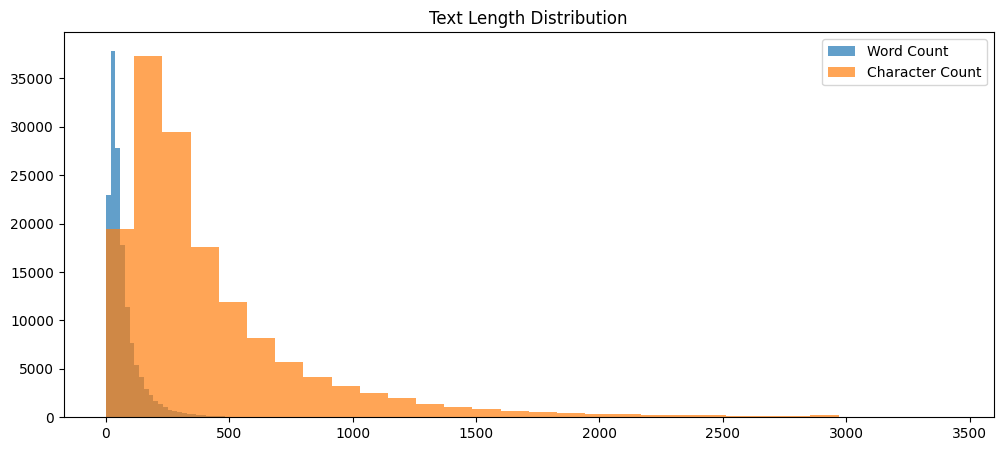

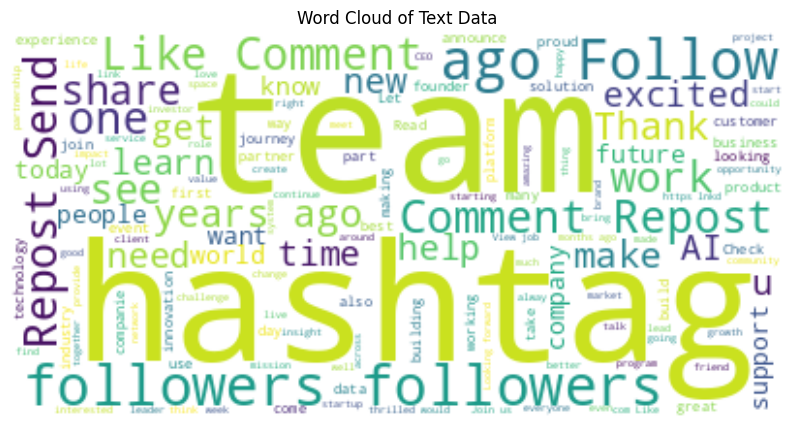

In [ ]:
# EDA: Analyze the text column
def eda_text_column(df, column_name):
    print(f"Total rows: {len(df)}")
    print(f"Missing values: {df[column_name].isnull().sum()}")
    print(f"Duplicate entries: {df[column_name].duplicated().sum()}")
    print(f"Unique entries: {df[column_name].nunique()}")

    # Text length distributions
    df['text_length'] = df[column_name].str.len()
    df['word_count'] = df[column_name].str.split().apply(len)

    # Plot length distributions
    plt.figure(figsize=(12, 5))
    plt.hist(df['word_count'].dropna(), bins=30, alpha=0.7, label='Word Count')
    plt.hist(df['text_length'].dropna(), bins=30, alpha=0.7, label='Character Count')
    plt.title('Text Length Distribution')
    plt.legend()
    plt.show()

    # Generate Word Cloud
    all_text = " ".join(df[column_name].dropna())
    wordcloud = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(all_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Text Data")
    plt.show()

eda_text_column(posts_df, 'cleaned_posts')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total rows: 148439
Missing values: 0
Duplicate entries: 7873
Unique entries: 140566


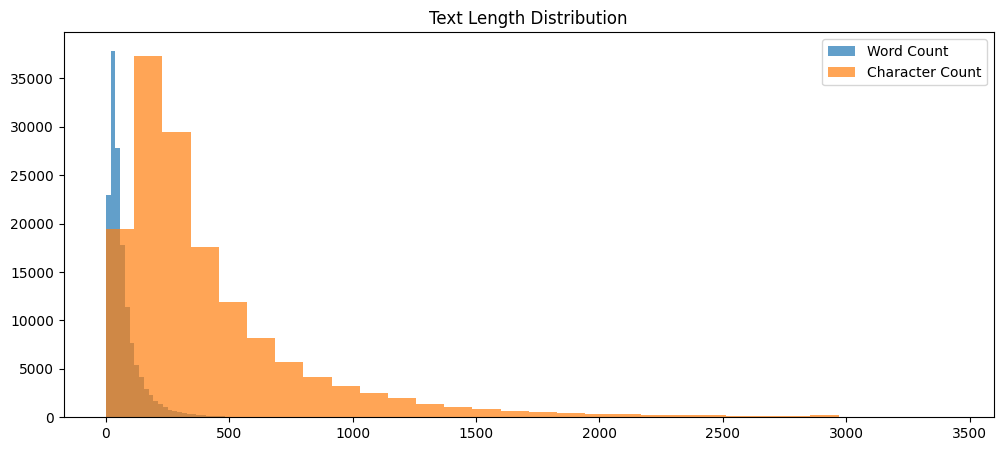

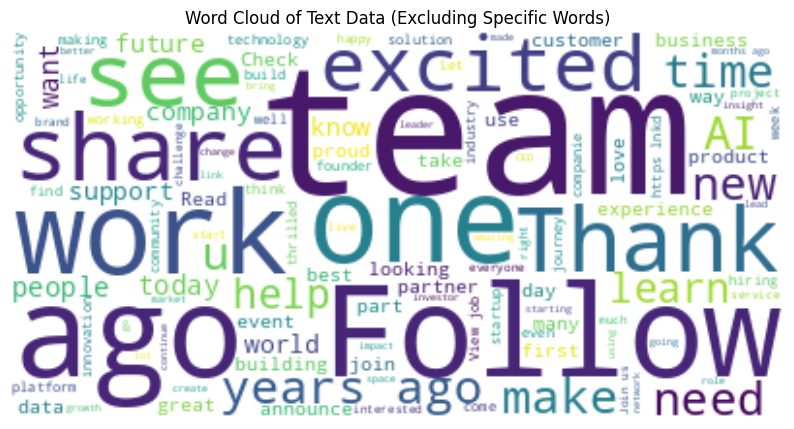

In [ ]:
# EDA: Analyze the text column

# Download stopwords if not already downloaded
nltk.download('stopwords')

def eda_text_column(df, column_name):
    print(f"Total rows: {len(df)}")
    print(f"Missing values: {df[column_name].isnull().sum()}")
    print(f"Duplicate entries: {df[column_name].duplicated().sum()}")
    print(f"Unique entries: {df[column_name].nunique()}")

    # Text length distributions
    df['text_length'] = df[column_name].str.len()
    df['word_count'] = df[column_name].str.split().apply(len)

    # Plot length distributions
    plt.figure(figsize=(12, 5))
    plt.hist(df['word_count'].dropna(), bins=30, alpha=0.7, label='Word Count')
    plt.hist(df['text_length'].dropna(), bins=30, alpha=0.7, label='Character Count')
    plt.title('Text Length Distribution')
    plt.legend()
    plt.show()

    # Generate Word Cloud
    excluded_words = {"hashtag", "comment", "like", "repost", "send", "followers"}
    custom_stopwords = set(stopwords.words('english')) | STOPWORDS | excluded_words

    # Concatenate all text for the word cloud
    all_text = " ".join(df[column_name].dropna())

    # Generate the word cloud with the additional excluded words
    wordcloud = WordCloud(
        stopwords=custom_stopwords,
        background_color='white'
    ).generate(all_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Text Data (Excluding Specific Words)")
    plt.show()

# Assuming `posts_df` is your DataFrame
eda_text_column(posts_df, 'cleaned_posts')


2. Preprocessing for Clustering Steps:
- Tokenization and text cleaning (e.g., removing stopwords, punctuation).
- Vectorization for clustering (e.g., TF-IDF or word embeddings).

In [ ]:
def train_test_split_data(data, test_size=0.3, random_state=42):
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=random_state)

    # Verify the result
    print(f"Number of rows in training data: {len(train_data)}")
    print(f"Number of rows in test data: {len(test_data)}")

    return train_data, test_data

Preprocessing: Tokenization and Text Cleaning

In [ ]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(df, column_name):
    stop_words = set(stopwords.words('english'))

    # Tokenization and Cleaning
    df['cleaned_text'] = df[column_name].dropna().apply(
        lambda x: " ".join([word for word in word_tokenize(x.lower())
                            if word.isalpha() and word not in stop_words])
    )
    return df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vectorization for Clustering: TF-IDF

In [ ]:
def vectorize_text(df, column_name):
    vectorizer = TfidfVectorizer(max_features=1000)  # Adjust features as needed
    X = vectorizer.fit_transform(df[column_name].dropna())
    return X, vectorizer


In [ ]:
#train_data, test_data = train_test_split_data(data, test_size=0.3, random_state=42)

In [ ]:
train_feature_data = preprocess_text(train_feature_data, 'cleaned_posts')

In [ ]:
train_data = preprocess_text(train_data, 'cleaned_posts')

In [ ]:
test_data = preprocess_text(test_data, 'cleaned_posts')


In [ ]:
personality_train_data = preprocess_text(personality_train_data, 'cleaned_posts')
personality_test_data = preprocess_text(personality_test_data, 'cleaned_posts')
#personality_train_model_data = preprocess_text(personality_train_model_data, 'cleaned_posts')

In [ ]:
test_data

,Unnamed: 0,username,cleaned_posts,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text
0,17116,joseph-chen-cmrp-691bb510,"While building my career in CPG in Canada, Can...",0,0,0,building career cpg canada canadian grocer alw...
1,17116,joseph-chen-cmrp-691bb510,We're proud to welcome Megan Harris to the Leo...,0,0,0,proud welcome megan harris leo dragon team mar...
2,17116,joseph-chen-cmrp-691bb510,Are collaborations the future of marketing in ...,0,0,0,collaborations future marketing food beverage ...
3,17116,joseph-chen-cmrp-691bb510,Seed oils are under fire. A few thoughts on po...,0,0,0,seed oils fire thoughts potential solutions br...
4,17116,joseph-chen-cmrp-691bb510,"Move over avocados, pomegranates, and acai; da...",0,0,0,move avocados pomegranates acai dates latest s...
...,...,...,...,...,...,...,...
47240,19323,nicholasshevelyov,Innovation in the UAE continues! Congratulatio...,0,1,1,innovation uae continues congratulations venky...
47241,19323,nicholasshevelyov,I look forward to participating!\nCOFENSE\nCOF...,0,1,1,look forward participating cofense cofense fol...
47242,19323,nicholasshevelyov,I’m happy to share that I’m starting a new pos...,0,1,1,happy share starting new position member board...
47243,19323,nicholasshevelyov,While Security Exchange Gateways (SEGs) are cr...,0,1,1,security exchange gateways segs crucial protec...


For the vectorization we have to train the vectorization on the train data and apply it to the test data

In [ ]:
X_train, vectorizer = vectorize_text(train_data, 'cleaned_text')


In [ ]:
X_test = vectorizer.transform(test_data['cleaned_text'].dropna())

In [ ]:
X_test

<43915x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 818387 stored elements in Compressed Sparse Row format>

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl


3. Clustering Approaches:
- K-means with vectorized data.
- Hierarchical clustering.
- Topic modeling with Latent Dirichlet Allocation (LDA).

Split data in train and test split. Usually in supervised learing a train test split is uncommon, but in this case it is important, because we want to make sure that the clusters are applicable to previously unseen data

Step 3: Clustering with K-Means

In [ ]:
def cluster_text(X_train, X_test, n_clusters=5):
    # Step 2: Train the KMeans model on the training dataset
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)  # Train the model on the training data

    # Step 3: Predict the clusters on the test dataset
    train_clusters = kmeans.predict(X_train)  # Predict on the training data
    test_clusters = kmeans.predict(X_test)  # Predict on the test data

    # Step 4: Evaluate clustering on the test dataset using Silhouette Score
    score = silhouette_score(X_test, test_clusters)
    print(f"Silhouette Score on test data for {n_clusters} clusters: {score}")

    # Step 5: Return both the test clusters and the trained KMeans model
    return test_clusters, train_clusters, kmeans  # Ensure you return these values


Step 3.1: Visualize Clusters

In [ ]:
def visualize_clusters(X, clusters):
    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X.toarray())

    # Plot the clusters
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title("PCA Visualization of Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


Step 4: Assign Topics to Clusters

In [ ]:
def assign_topic_labels(df, clusters, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    df['posts_cluster_Kmeans_initial_model'] = clusters

    # Get top words for each cluster
    topic_labels = {}
    for cluster in set(clusters):
        # Combine all text in the cluster
        cluster_texts = " ".join(df[df['posts_cluster_Kmeans_initial_model'] == cluster]['cleaned_text'])
        # Count term frequencies
        cluster_vector = Counter(word_tokenize(cluster_texts))
        top_words = cluster_vector.most_common(n_top_words)
        topic_labels[cluster] = [word for word, _ in top_words]

    # Display topics
    print("Cluster Topics:")
    for cluster, words in topic_labels.items():
        print(f"Cluster {cluster}: {', '.join(words)}")

    return topic_labels


1. Perform Clusting:

Silhouette Score on test data for 5 clusters: 0.022840844084651896


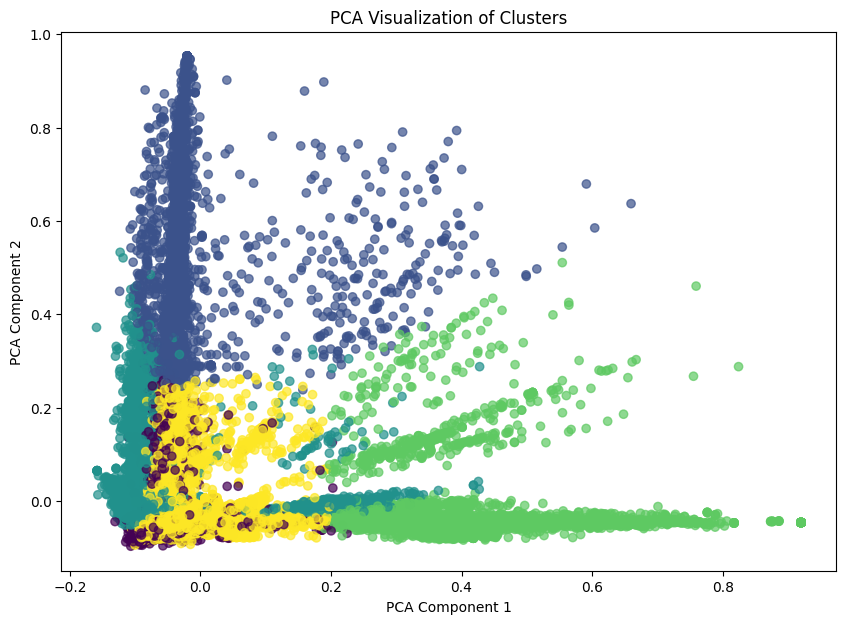

In [ ]:
test_clusters, train_clusters, kmeans_model = cluster_text(X_train, X_test, n_clusters=5)
visualize_clusters(X_test, test_clusters)


2. Assign Topics:

Comparing the labeling of the clusters for test and training data

In [ ]:
topic_labels = assign_topic_labels(test_data, test_clusters, vectorizer)

Cluster Topics:
Cluster 0: team, great, work, new, us, looking, excited, join, amazing, thank
Cluster 1: hashtag, followers, ago, comment, like, repost, follow, ai, years, team
Cluster 2: followers, ago, follow, years, hashtag, team, new, us, edited, year
Cluster 3: comment, repost, like, send, job, comments, new, view, hashtag, position
Cluster 4: new, ai, us, one, time, data, people, get, business, work


In [ ]:
topic_labels = assign_topic_labels(train_data, train_clusters, vectorizer)

Cluster Topics:
Cluster 0: team, great, work, us, new, looking, excited, thank, join, amazing
Cluster 1: hashtag, followers, ago, comment, like, follow, repost, send, years, team
Cluster 2: followers, ago, follow, years, hashtag, team, us, new, months, year
Cluster 3: comment, repost, like, send, job, new, comments, view, hashtag, position
Cluster 4: new, ai, us, time, one, data, business, people, get, work


### Cluster Analysis of Test data Clusters

Cluster 0: Onboarding and Team Collaboration
Keywords: team, great, work, new, us, looking, excited, join, amazing, thank
Interpretation: This cluster seems to focus on themes related to teamwork, collaboration, and welcoming new members. Keywords like "team," "join," and "excited" suggest an emphasis on new team members or organizational updates celebrating achievements and collaboration.


Cluster 1: Social Media Growth and AI Awareness
Keywords: hashtag, followers, ago, comment, like, repost, follow, ai, years, team
Interpretation: This cluster is related to social media interactions, engagement, and AI content. The presence of "hashtag," "like," and "repost" indicates an emphasis on strategies to increase visibility and engagement. The inclusion of "ai" suggests that some posts might discuss technology trends, particularly AI.


Cluster 2: Historical and Follower Growth
Keywords: followers, ago, follow, years, hashtag, team, new, us, edited, year
Interpretation: This cluster highlights historical growth, likely focused on milestones in follower count or significant events over time. Terms like "years," "ago," and "followers" suggest reflecting on past achievements or progress updates.


Cluster 3: Audience Engagement and Recruitment
Keywords: comment, repost, like, send, job, comments, new, view, hashtag, position
Interpretation: This cluster revolves around audience engagement and recruitment. Words like "comment," "repost," and "job" suggest posts encouraging interaction or promoting open positions. This may reflect efforts to foster community engagement or drive applications for roles.


Cluster 4: Innovation, Data, and Business Development
Keywords: new, ai, us, one, time, data, people, get, business, work
Interpretation: This cluster emphasizes innovation and business strategies. The presence of "ai," "data," and "business" indicates a focus on technological advancements, data-driven insights, and business opportunities. Posts in this cluster might highlight new products, services, or partnerships.
Overall Themes
The clusters suggest a focus on team collaboration, social media engagement, historical milestones, community interaction and recruitment, and innovation in AI and business.
These categories likely align with organizational goals, emphasizing visibility, engagement, growth, and innovation.

In [ ]:
# prompt: give me a code to improve the hyperparameters to reach the best possible silhuette score on the respective kvold holdouts
C_train, C_test = train_test_split(X_train, test_size=0.2, random_state=42)  # Adjust test size as needed

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], # Number of Clusters
    'max_iter': [300], # Maximum Iterations
    'n_init': [15]   # Number of initializations
}

best_score = -1
best_params = {}
best_kmeans_model = None

# Iterate through all combinations of parameters
for params in ParameterGrid(param_grid):
    kmeans = KMeans(**params, random_state=42)  # Create a KMeans model with the current parameters
    kmeans.fit(C_train)

    train_clusters = kmeans.predict(C_train)
    c_test_clusters = kmeans.predict(C_test)
    score = silhouette_score(C_test, c_test_clusters)

    print(f"Parameters: {params}, Silhouette Score: {score}")

    if score > best_score:
        best_score = score
        best_params = params
        best_kmeans_model = kmeans

print(f"\nBest Parameters: {best_params}, Best Silhouette Score: {best_score}")

# Visualize best clusters
def visualize_clusters(X, clusters):
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X.toarray())
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title("PCA Visualization of Best Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

visualize_clusters(C_test, best_kmeans_model.predict(C_test))


def assign_topic_labels(df, clusters, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    df['posts_grid_optimized_k-means_cluster'] = clusters
    topic_labels = {}
    for cluster in set(clusters):
        cluster_texts = " ".join(df[df['posts_grid_optimized_k-means_cluster'] == cluster]['cleaned_text'])
        cluster_vector = Counter(word_tokenize(cluster_texts))
        top_words = cluster_vector.most_common(n_top_words)
        topic_labels[cluster] = [word for word, _ in top_words]
    print("Cluster Topics:")
    for cluster, words in topic_labels.items():
        print(f"Cluster {cluster}: {', '.join(words)}")
    return topic_labels


# Assign topics using the best model
c_train_clusters = best_kmeans_model.predict(C_train)
c_test_clusters = best_kmeans_model.predict(C_test)
test_clusters = best_kmeans_model.predict(X_test)
train_clusters = best_kmeans_model.predict(X_train)

print("clusters on previously unseen data to prevent overfitting on the test data:")
score = silhouette_score(X_test, test_clusters)
print(f"Silhouette Score for Test Clusters: {score}")
# Visualize test clusters
visualize_clusters(X_test, test_clusters)

topic_labels = assign_topic_labels(train_data, train_clusters, vectorizer)
topic_labels = assign_topic_labels(test_data, test_clusters, vectorizer)

NameError: name 'train_test_split' is not defined

## Hierarchical Clustering
### Normalization
KMeans does not use a distance matrix explicitly but rather computes distances dynamically during the clustering process (e.g., using Euclidean distance). However, normalization or standardization is still important for KMeans.

Since hierarchical clustering uses distances, it's essential to normalize or standardize the data (e.g., using MinMaxScaler or StandardScaler).

Unfortunately we can not use hierarchical clustering on this probelm, because it does not allow us to cluster previously unseen data. The goal of our models final model is, that we can also apply it to new data. Features created by hierarchical clustering don't allow this because hierarchical clustering requires a linkage matrix.


Additional Notes
Clustering Methods: Common linkage methods include:

ward: Minimizes the variance within clusters.
single: Uses the minimum distance between points.
complete: Uses the maximum distance between points.
average: Uses the average distance between points.
Choose the method based on the structure of your data.

When to Use Distance Threshold:

If you want to dynamically determine clusters based on a similarity threshold, use distance_threshold.
Let me know if you'd like to execute or modify any of these steps!


Topic modeling with Latent Dirichlet Allocation (LDA).

TF-IDF vectorizer work best if the tokens are joined together to one string. This is not true for LDA. Here it is better to keep the different tokens in a list.

Preprocessing: Tokenization and Text Cleaning as a list of tokens

In [ ]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(df, column_name):
    stop_words = set(stopwords.words('english'))

    # Tokenization and Cleaning
    df['tokens'] = df[column_name].dropna().apply(
        lambda x: [word for word in word_tokenize(x.lower())
                   if word.isalpha() and word not in stop_words]
    )
    return df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_data = preprocess_text(train_data, 'cleaned_posts')

In [ ]:
test_data = preprocess_text(test_data, 'cleaned_posts')

In [ ]:
test_data

,Unnamed: 0,username,cleaned_posts,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,posts_cluster_Kmeans_initial_model,posts_grid_optimized_k-means_cluster,tokens
0,17116,joseph-chen-cmrp-691bb510,"While building my career in CPG in Canada, Can...",0,0,0,building career cpg canada canadian grocer alw...,4,1,"[building, career, cpg, canada, canadian, groc..."
1,17116,joseph-chen-cmrp-691bb510,We're proud to welcome Megan Harris to the Leo...,0,0,0,proud welcome megan harris leo dragon team mar...,0,11,"[proud, welcome, megan, harris, leo, dragon, t..."
2,17116,joseph-chen-cmrp-691bb510,Are collaborations the future of marketing in ...,0,0,0,collaborations future marketing food beverage ...,0,6,"[collaborations, future, marketing, food, beve..."
3,17116,joseph-chen-cmrp-691bb510,Seed oils are under fire. A few thoughts on po...,0,0,0,seed oils fire thoughts potential solutions br...,4,4,"[seed, oils, fire, thoughts, potential, soluti..."
4,17116,joseph-chen-cmrp-691bb510,"Move over avocados, pomegranates, and acai; da...",0,0,0,move avocados pomegranates acai dates latest s...,4,3,"[move, avocados, pomegranates, acai, dates, la..."
...,...,...,...,...,...,...,...,...,...,...
47240,19323,nicholasshevelyov,Innovation in the UAE continues! Congratulatio...,0,1,1,innovation uae continues congratulations venky...,4,5,"[innovation, uae, continues, congratulations, ..."
47241,19323,nicholasshevelyov,I look forward to participating!\nCOFENSE\nCOF...,0,1,1,look forward participating cofense cofense fol...,2,16,"[look, forward, participating, cofense, cofens..."
47242,19323,nicholasshevelyov,I’m happy to share that I’m starting a new pos...,0,1,1,happy share starting new position member board...,4,8,"[happy, share, starting, new, position, member..."
47243,19323,nicholasshevelyov,While Security Exchange Gateways (SEGs) are cr...,0,1,1,security exchange gateways segs crucial protec...,4,10,"[security, exchange, gateways, segs, crucial, ..."


Vectorization for Clustering: TfidfVectorizer

In [ ]:
# Step 1: Create a Dictionary from the train data (only use train data for dictionary creation)
train_tokens = train_data['tokens'].tolist()
dictionary = corpora.Dictionary(train_tokens)  # Use train data only for the dictionary

# Step 2: Create a Bag-of-Words (BoW) representation of the training documents
train_corpus = [dictionary.doc2bow(tokens) for tokens in train_tokens]

# Step 3: Apply LDA to the training corpus (train data only)
lda_model = gensim.models.LdaMulticore(train_corpus, num_topics=5, id2word=dictionary, passes=10)

# Step 4: Print the topics discovered by LDA
print("Topics discovered by LDA:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic #{idx}: {topic}")

# Step 5: Vectorize the test data using the same dictionary
test_tokens = test_data['tokens'].tolist()
test_corpus = [dictionary.doc2bow(tokens) for tokens in test_tokens]

# Step 6: Get the topic distribution for each document in the test corpus
test_topic_distribution = [lda_model.get_document_topics(doc) for doc in test_corpus]

# Optionally, you can assign the most likely topic to each document
test_data['posts_LDA_assigned_topic'] = [max(dist, key=lambda x: x[1])[0] for dist in test_topic_distribution]

# Step 7: Output the topics for the test data
print("\nTest Data with Assigned Topics:")
print(test_data[['tokens', 'posts_LDA_assigned_topic']].head())

# Step 8: Get the topic distribution for each document in the train corpus
train_topic_distribution = [lda_model.get_document_topics(doc) for doc in train_corpus]

# Step 9: Assign the most likely topic to each document in the train data
train_data['posts_LDA_assigned_topic'] = [max(dist, key=lambda x: x[1])[0] for dist in train_topic_distribution]

# Step 10: Output the topics for the train data
print("\nTrain Data with Assigned Topics:")
print(train_data[['tokens', 'posts_LDA_assigned_topic']].head())

Topics discovered by LDA:
Topic #0: 0.011*"followers" + 0.008*"team" + 0.007*"great" + 0.007*"us" + 0.006*"ago" + 0.006*"thank" + 0.006*"event" + 0.006*"follow" + 0.006*"year" + 0.005*"excited"
Topic #1: 0.006*"followers" + 0.005*"data" + 0.004*"new" + 0.004*"team" + 0.004*"health" + 0.004*"technology" + 0.004*"ai" + 0.004*"ago" + 0.004*"us" + 0.003*"follow"
Topic #2: 0.006*"people" + 0.006*"time" + 0.006*"work" + 0.006*"one" + 0.005*"team" + 0.005*"new" + 0.004*"get" + 0.004*"ai" + 0.004*"make" + 0.004*"business"
Topic #3: 0.061*"hashtag" + 0.040*"comment" + 0.039*"repost" + 0.038*"like" + 0.036*"send" + 0.015*"new" + 0.014*"followers" + 0.010*"comments" + 0.008*"starting" + 0.008*"position"
Topic #4: 0.017*"job" + 0.017*"followers" + 0.010*"view" + 0.010*"hiring" + 0.010*"team" + 0.009*"looking" + 0.009*"follow" + 0.009*"ago" + 0.007*"new" + 0.007*"data"

Test Data with Assigned Topics:
                                              tokens  posts_LDA_assigned_topic
0  [building, caree

### Topic Analysis
Topic #0: Organizational Events and Team Appreciation
Top Words: followers, team, great, us, ago, thank, event, follow, year, excited
Interpretation: This topic reflects themes of team acknowledgment, organizational events, and community engagement. Words like "followers," "thank," and "excited" suggest a celebratory tone, possibly linked to milestones, team achievements, or events. "Ago" and "year" imply a retrospective element, such as reflecting on past successes or anniversaries.
Possible Contexts:
Announcing team achievements or milestones.
Thanking followers or participants for their support.
Highlighting recent or upcoming events.


Topic #1: Technology, Health, and Innovation
Top Words: followers, data, new, team, health, technology, AI, ago, us, follow
Interpretation: This topic emphasizes technological advancements, innovation in AI, and applications in health. The mix of "followers" and "team" suggests updates on team projects or public-facing content related to technology and data.
Possible Contexts:
Sharing updates on new AI-driven health technologies.
Highlighting the team's work in innovative fields.
Engaging with followers on topics of tech-driven progress.


Topic #2: Work, Business, and AI Applications
Top Words: people, time, work, one, team, new, get, AI, make, business
Interpretation: This topic focuses on productivity, teamwork, and AI's role in driving business outcomes. Words like "work," "business," and "make" suggest content about achieving goals or enhancing processes. The inclusion of "people" emphasizes a human-centered approach.
Possible Contexts:
Discussing how AI is transforming the workplace or industries.
Sharing insights on teamwork or business strategies.
Encouraging productivity and innovation in professional settings.


Topic #3: Social Media Engagement and Interactive Content
Top Words: hashtag, comment, repost, like, send, new, followers, comments, starting, position
Interpretation: This topic revolves around social media interaction and strategies to increase engagement. Words like "hashtag," "comment," and "like" indicate efforts to boost visibility and interaction. "Send" and "starting" may relate to calls to action or content aimed at encouraging participation.
Possible Contexts:
Promoting user engagement through hashtags and reposts.
Sharing interactive campaigns or contests.
Encouraging followers to comment or participate.


Topic #4: Hiring and Career Opportunities
Top Words: job, followers, view, hiring, team, looking, follow, ago, new, data
Interpretation: This topic highlights recruitment and career opportunities. Words like "job," "hiring," and "team" suggest a focus on recruitment campaigns or showcasing available roles. "Followers" and "view" indicate content aimed at attracting attention from the audience.
Possible Contexts:
Posting job openings or career updates.
Encouraging followers to apply for positions or refer candidates.
Sharing team stories to attract talent.


**Summary of Themes**


Team and Community: Topics #0 and #1 emphasize team collaboration, community appreciation, and milestones.

Innovation and Technology: Topics #1 and #2 focus on AI, data, and their applications in health and business.

Social Media Engagement: Topic #3 highlights strategies to boost interaction and visibility on social platforms.

Recruitment and Hiring: Topic #4 targets job postings and career-related content.


In [ ]:
test_data

,Unnamed: 0,username,cleaned_posts,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,posts_cluster_Kmeans_initial_model,posts_grid_optimized_k-means_cluster,tokens,posts_LDA_assigned_topic
0,17116,joseph-chen-cmrp-691bb510,"While building my career in CPG in Canada, Can...",0,0,0,building career cpg canada canadian grocer alw...,4,1,"[building, career, cpg, canada, canadian, groc...",0
1,17116,joseph-chen-cmrp-691bb510,We're proud to welcome Megan Harris to the Leo...,0,0,0,proud welcome megan harris leo dragon team mar...,0,11,"[proud, welcome, megan, harris, leo, dragon, t...",0
2,17116,joseph-chen-cmrp-691bb510,Are collaborations the future of marketing in ...,0,0,0,collaborations future marketing food beverage ...,0,6,"[collaborations, future, marketing, food, beve...",2
3,17116,joseph-chen-cmrp-691bb510,Seed oils are under fire. A few thoughts on po...,0,0,0,seed oils fire thoughts potential solutions br...,4,4,"[seed, oils, fire, thoughts, potential, soluti...",1
4,17116,joseph-chen-cmrp-691bb510,"Move over avocados, pomegranates, and acai; da...",0,0,0,move avocados pomegranates acai dates latest s...,4,3,"[move, avocados, pomegranates, acai, dates, la...",2
...,...,...,...,...,...,...,...,...,...,...,...
47240,19323,nicholasshevelyov,Innovation in the UAE continues! Congratulatio...,0,1,1,innovation uae continues congratulations venky...,4,5,"[innovation, uae, continues, congratulations, ...",0
47241,19323,nicholasshevelyov,I look forward to participating!\nCOFENSE\nCOF...,0,1,1,look forward participating cofense cofense fol...,2,16,"[look, forward, participating, cofense, cofens...",0
47242,19323,nicholasshevelyov,I’m happy to share that I’m starting a new pos...,0,1,1,happy share starting new position member board...,4,8,"[happy, share, starting, new, position, member...",3
47243,19323,nicholasshevelyov,While Security Exchange Gateways (SEGs) are cr...,0,1,1,security exchange gateways segs crucial protec...,4,10,"[security, exchange, gateways, segs, crucial, ...",1


In [ ]:
test_data.columns

Index(['Unnamed: 0', 'username', 'cleaned_posts', 'Success_after_5_years',
       'equity_rounds_raised_after_5_years', 'Success_until_now',
       'cleaned_text', 'posts_cluster_Kmeans_initial_model',
       'posts_grid_optimized_k-means_cluster', 'tokens',
       'posts_LDA_assigned_topic'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Silhouette Score for Test Data: 0.013037643395364285
Train Data with Clusters:
                                       cleaned_text1  \
0  hey everyone the threat detection team at appo...   
1  farm box  a journey into regenerative farming\...   
2  love this book \n\n\ni recently had an intervi...   
3  after the farmers guardian british farming awa...   
4  throwback to the last weeks farmers guardian b...   

   posts_cluster_Bert_Kmeans  
0                          4  
1                          2  
2                          1  
3                          1  
4                          1  
Test Data with Predicted Clusters:
                                       cleaned_text1  \
0  while building my career in cpg in canada cana...   
1  were proud to welcome megan harris to the leo ...   
2  are collaborations the future of marketing in ...   
3  seed oils are under fire a few thoughts on pot...   
4  move over avocados pomegranates and acai dates...   

   posts_cluster_Bert_Kmea

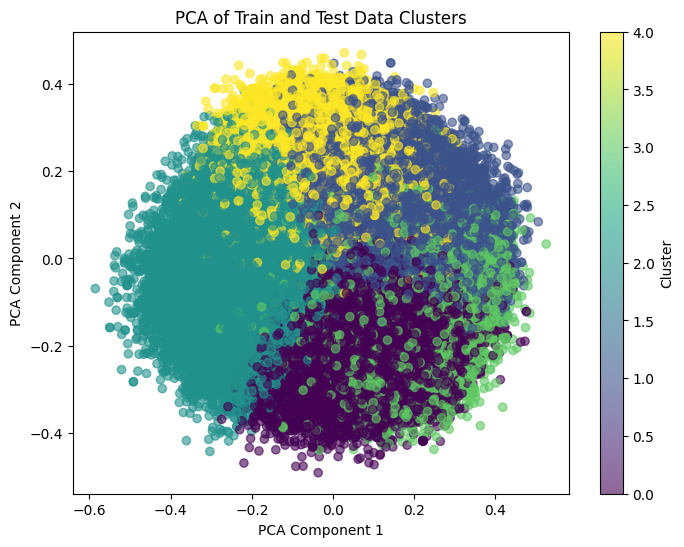

In [ ]:
# Function to clean and preprocess the text data (optional)
def preprocess_text(text):
    # Basic text preprocessing (optional)
    text = text.lower()
    text = ''.join(e for e in text if e.isalnum() or e.isspace())
    return text

# Step 1: Preprocess the train and test data
train_data['cleaned_text1'] = train_data['cleaned_posts'].apply(preprocess_text)
test_data['cleaned_text1'] = test_data['cleaned_posts'].apply(preprocess_text)
train_feature_data['cleaned_text1'] = train_feature_data['cleaned_posts'].apply(preprocess_text)
personality_train_data['cleaned_text1'] = personality_train_data['cleaned_posts'].apply(preprocess_text)
personality_test_data['cleaned_text1'] = personality_test_data['cleaned_posts'].apply(preprocess_text)
#personality_train_model_data['cleaned_text1'] = personality_train_model_data['cleaned_posts'].apply(preprocess_text)

# Step 2: Load a pre-trained SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')  # A lightweight model for embeddings

# Step 3: Generate embeddings for train and test data
train_embeddings = model.encode(train_data['cleaned_text1'].tolist(), convert_to_numpy=True)
test_embeddings = model.encode(test_data['cleaned_text1'].tolist(), convert_to_numpy=True)
train_feature_embeddings = model.encode(train_feature_data['cleaned_text1'].tolist(), convert_to_numpy=True)
personality_train_embeddings = model.encode(personality_train_data['cleaned_text1'].tolist(), convert_to_numpy=True)
personality_test_embeddings = model.encode(personality_test_data['cleaned_text1'].tolist(), convert_to_numpy=True)
#personality_train_model_embeddings = model.encode(personality_train_model_data['cleaned_text1'].tolist(), convert_to_numpy=True)


# Step 4: Apply K-Means clustering on train data
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
train_data['posts_cluster_Bert_Kmeans'] = kmeans.fit_predict(train_embeddings)

# Step 5: Predict the clusters for test data
test_data['posts_cluster_Bert_Kmeans'] = kmeans.predict(test_embeddings)

# Step 6: Compute Silhouette score for test data
sil_score = silhouette_score(test_embeddings, test_data['posts_cluster_Bert_Kmeans'])
print(f"Silhouette Score for Test Data: {sil_score}")

# Step 7: Output the clustered data
print("Train Data with Clusters:")
print(train_data[['cleaned_text1', 'posts_cluster_Bert_Kmeans']].head())

print("Test Data with Predicted Clusters:")
print(test_data[['cleaned_text1', 'posts_cluster_Bert_Kmeans']].head())

# Optionally, save the output to CSV files
train_data[['cleaned_text1', 'posts_cluster_Bert_Kmeans']].to_csv('clustered_train_data.csv', index=False)
test_data[['cleaned_text1', 'posts_cluster_Bert_Kmeans']].to_csv('clustered_test_data.csv', index=False)

# Step 8: PCA Visualization of the clusters
# Combine train and test embeddings for PCA visualization
combined_embeddings = np.concatenate([train_embeddings, test_embeddings])
combined_labels = np.concatenate([train_data['posts_cluster_Bert_Kmeans'], test_data['posts_cluster_Bert_Kmeans']])

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(combined_embeddings)

# Create a DataFrame for plotting
combined_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
combined_df['Cluster'] = combined_labels

# Plot the PCA components with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['PCA1'], combined_df['PCA2'], c=combined_df['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title('PCA of Train and Test Data Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


n_clusters: 2, init: k-means++, max_iter: 100, Silhouette Score: 0.022487912327051163
n_clusters: 2, init: k-means++, max_iter: 200, Silhouette Score: 0.022487912327051163
n_clusters: 2, init: k-means++, max_iter: 300, Silhouette Score: 0.022487912327051163
n_clusters: 2, init: random, max_iter: 100, Silhouette Score: 0.02265634573996067
n_clusters: 2, init: random, max_iter: 200, Silhouette Score: 0.02265634573996067
n_clusters: 2, init: random, max_iter: 300, Silhouette Score: 0.02265634573996067
n_clusters: 3, init: k-means++, max_iter: 100, Silhouette Score: 0.012567181140184402
n_clusters: 3, init: k-means++, max_iter: 200, Silhouette Score: 0.012567181140184402
n_clusters: 3, init: k-means++, max_iter: 300, Silhouette Score: 0.012567181140184402
n_clusters: 3, init: random, max_iter: 100, Silhouette Score: 0.012018886394798756
n_clusters: 3, init: random, max_iter: 200, Silhouette Score: 0.012018886394798756
n_clusters: 3, init: random, max_iter: 300, Silhouette Score: 0.01201888

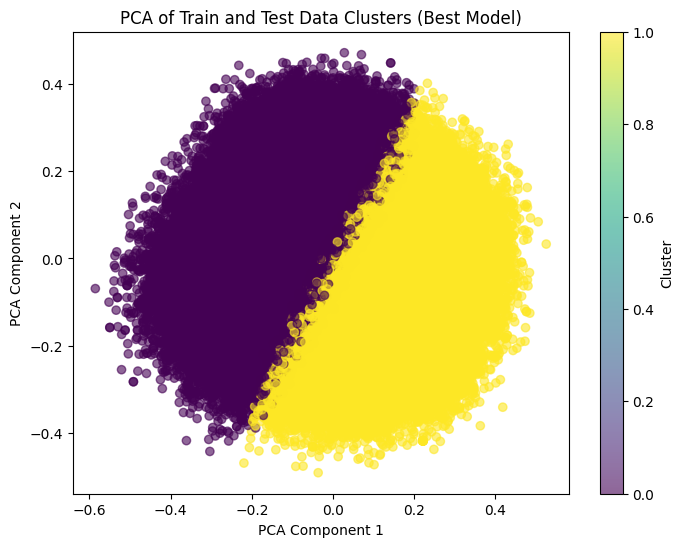

In [ ]:
C_train_embeddings, C_test_embeddings = train_test_split(train_embeddings, test_size=0.2, random_state=42)  # Adjust test size as needed

# Define the search space for hyperparameters
n_clusters_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Range of number of clusters to try
init_methods = ['k-means++', 'random']  # Different initialization methods for centroids
max_iter_range = [100, 200, 300]  # Different number of iterations for KMeans

# Function to evaluate silhouette score for a set of hyperparameters
def evaluate_kmeans(n_clusters, init, max_iter, C_train_embeddings, C_test_embeddings):
    kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, random_state=42)
    kmeans.fit(C_train_embeddings)  # Train on the train set
    C_test_clusters = kmeans.predict(C_test_embeddings)  # Predict on the test set

    # Calculate the silhouette score
    sil_score = silhouette_score(C_test_embeddings, C_test_clusters)
    return sil_score, kmeans  # Return both score and the trained model

# Search through the hyperparameter combinations
best_score = -1
best_params = None
best_kmeans = None

for n_clusters in n_clusters_range:
    for init in init_methods:
        for max_iter in max_iter_range:
            # Evaluate for the current hyperparameters
            sil_score, kmeans = evaluate_kmeans(n_clusters, init, max_iter, C_train_embeddings, C_test_embeddings)
            print(f"n_clusters: {n_clusters}, init: {init}, max_iter: {max_iter}, Silhouette Score: {sil_score}")

            # If the current score is better than the best score, update the best parameters
            if sil_score > best_score:
                best_score = sil_score
                best_params = (n_clusters, init, max_iter)
                best_kmeans = kmeans

# Output the best hyperparameters and the corresponding silhouette score
print("\nBest Hyperparameters found:")
print(f"n_clusters: {best_params[0]}, init: {best_params[1]}, max_iter: {best_params[2]}")
print(f"Best Silhouette Score: {best_score}")

# Step 1: Assign the best cluster labels to the train and test data
train_data['posts_K-means_Bert_cluster'] = best_kmeans.predict(train_embeddings)
test_data['posts_K-means_Bert_cluster'] = best_kmeans.predict(test_embeddings)

print("clusters on previously unseen data, even in the hyper parameter optimization process to prevent overfitting on the test data:")
score = silhouette_score(test_embeddings, test_data['posts_K-means_Bert_cluster'])
print(f"Silhouette Score for Test Clusters: {score}")
# Step 2: PCA Visualization of the clusters
# Combine train and test embeddings for PCA visualization
combined_embeddings = np.concatenate([train_embeddings, test_embeddings])
combined_labels = np.concatenate([train_data['posts_K-means_Bert_cluster'], test_data['posts_K-means_Bert_cluster']])

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(combined_embeddings)

# Create a DataFrame for plotting
combined_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
combined_df['Cluster'] = combined_labels

# Plot the PCA components with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['PCA1'], combined_df['PCA2'], c=combined_df['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title('PCA of Train and Test Data Clusters (Best Model)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



BERTopic: can cluster end extract topics out of BERT embedded texts

In [ ]:
test_embeddings

array([[-0.03330305,  0.0261681 , -0.04048136, ..., -0.078456  ,
         0.00964145,  0.05711284],
       [-0.11167704, -0.03685424,  0.05107035, ..., -0.08688898,
        -0.00879483,  0.00852592],
       [ 0.05589203, -0.02883406, -0.04934848, ..., -0.07245287,
         0.03580099,  0.00685176],
       ...,
       [-0.02848492, -0.05904637, -0.02595937, ..., -0.06447076,
        -0.0247449 ,  0.02442133],
       [-0.05762777, -0.05948446,  0.0044521 , ..., -0.15785675,
         0.03908033,  0.03037892],
       [-0.02130683, -0.01237684, -0.06600672, ..., -0.01977839,
         0.04148839, -0.00685722]], dtype=float32)

In [ ]:
# Step 1: Initialize BERTopic
topic_model = BERTopic(
    language="english",
    calculate_probabilities=True,  # Optional: Calculate probabilities for topic assignments
)

# Step 2: Fit the model using precomputed embeddings and corresponding text
topics, probabilities = topic_model.fit_transform(train_data['cleaned_text1'].tolist(), embeddings=train_embeddings)

# Step 3: Reduce the number of topics to a maximum of 20
# Pass the original documents (train_data['cleaned_text1'].tolist()) to reduce_topics
topic_model.reduce_topics(train_data['cleaned_text1'].tolist(), nr_topics=20)

# Step 4: Add the reduced topic labels to the training data
train_data['posts_K-means_Bertopic_topic'] = topic_model.get_document_info(train_data['cleaned_text1'])['Topic']

# Step 5: Apply the model to the test data
test_topics, _ = topic_model.transform(test_data['cleaned_text1'].tolist(), embeddings=test_embeddings)
test_data['posts_K-means_Bertopic_topic'] = test_topics

# Step 6: Explore the reduced topics
for topic in range(20):  # Assuming a maximum of 20 topics
    print(f"Topic {topic}: {topic_model.get_topic(topic)}")

# Step 7: Visualize the reduced topics
topic_model.visualize_topics()


Topic 0: [('the', 0.0321666455535709), ('to', 0.030385793995668767), ('and', 0.02924293419254606), ('of', 0.024691506448555563), ('in', 0.022575515402217524), ('for', 0.020744852065220292), ('is', 0.018160557056049173), ('with', 0.017239635516599246), ('on', 0.01608009795331121), ('our', 0.015902449120078745)]
Topic 1: [('you', 0.03659629151970149), ('to', 0.032134437640880496), ('the', 0.030691478076434634), ('and', 0.029652555734774905), ('mental', 0.027859858879707097), ('your', 0.02505525508106243), ('that', 0.024582590037104515), ('of', 0.024330311970152788), ('it', 0.023919788291647225), ('is', 0.022150541678898975)]
Topic 2: [('black', 0.044522293346511234), ('the', 0.027652252322626136), ('chris', 0.023898728130742685), ('of', 0.023465817756082575), ('and', 0.023422810842430964), ('to', 0.0220181339715753), ('anthony', 0.021930035032001974), ('james', 0.020534564953027204), ('on', 0.019289765254788694), ('elon', 0.018668012555901142)]
Topic 3: [('art', 0.04397955723515113), ('b

In [ ]:
# Step 1: Define a function to generate a label for each topic
def generate_topic_label(topic_num, top_n_words=5):
    # Get the top n words of the topic
    top_words = topic_model.get_topic(topic_num)

    # If the topic doesn't exist or has no words (i.e., it returns False), return a default label
    if not top_words:  # False, None, or empty list are handled here
        return f"Topic {topic_num} (No words)"

    # Extract the words from the list of tuples
    words = [word for word, _ in top_words[:top_n_words]]

    # Create a label by joining the top words
    label = " ".join(words)

    return label

# Step 2: Generate labels for all topics
topic_labels = {}
for topic_num in range(20):  # Assuming you have 20 topics
    topic_labels[topic_num] = generate_topic_label(topic_num)

# Step 3: Add the labels to the training data
train_data['posts_K-means_Bertopic_topic_label'] = train_data['posts_K-means_Bertopic_topic'].map(topic_labels)

# Step 4: Add the labels to the test data
test_data['posts_K-means_Bertopic_topic_label'] = test_data['posts_K-means_Bertopic_topic'].map(topic_labels)

# Step 5: Print the topic labels for verification
for topic_num, label in topic_labels.items():
    print(f"Topic {topic_num}: {label}")


Topic 0: the to and of in
Topic 1: you to the and mental
Topic 2: black the chris of and
Topic 3: art book the of and
Topic 4: the of financial to and
Topic 5: activate larger image view to
Topic 6: quantum graphene the computing of
Topic 7: react trustradius flutter b2breviews chrome
Topic 8: vote election the poll to
Topic 9: translation show job language comment
Topic 10: loading document finished has your
Topic 11: super bowl megacorp evil splintered
Topic 12: tpms tyre atlas tyres otr
Topic 13: suture aevumed rotator phantomlp cuff
Topic 14: typedb code the and efficalc
Topic 15: jeff gold 200m san 1089
Topic 16: hyacinth brigette warty ahmet tosun
Topic 17: waterfall gorge falls waterfalls gorges
Topic 18: soccer myemailapiconstantcontactcom myemailconstantcontactcom registration spring
Topic 19: Topic 19 (No words)


### Topic Analysis
Topic 0: General Language
Keywords: the, to, and, of, in
Interpretation: This cluster consists primarily of stopwords, which typically lack thematic significance. It might indicate either a baseline group or insufficient text preprocessing.

Topic 1: Mental Health Awareness
Keywords: you, to, the, and, mental
Interpretation: Likely focuses on mental health or well-being topics. Words like "you" and "mental" suggest content aimed at engaging individuals, possibly through advice or resources.

Topic 2: Entertainment and Personalities
Keywords: black, the, chris, of, and
Interpretation: Likely related to pop culture, entertainment, or specific personalities (e.g., Chris). "Black" might refer to themes in movies, music, or cultural discussions.

Topic 3: Art and Literature
Keywords: art, book, the, of, and
Interpretation: This cluster emphasizes art and literary themes, such as discussions around books, creativity, or artistic pursuits.

Topic 4: Financial Topics
Keywords: the, of, financial, to, and
Interpretation: Focused on finance, possibly covering investments, financial advice, or economic discussions.

Topic 5: Visual Content or Media
Keywords: activate, larger, image, view, to
Interpretation: Likely related to visual media or user interaction with images, such as activating larger views in digital platforms or presentations.

Topic 6: Quantum Computing and Materials
Keywords: quantum, graphene, the, computing, of
Interpretation: A highly technical topic centered on quantum computing and graphene, suggesting content about advanced materials and technologies.

Topic 7: Technology and Reviews
Keywords: react, trustradius, flutter, b2breviews, chrome
Interpretation: Focused on technology and software reviews. Mentions of "React" and "Flutter" indicate content on frameworks, while "TrustRadius" and "B2B reviews" point to user reviews.

Topic 8: Elections and Voting
Keywords: vote, election, the, poll, to
Interpretation: A political topic centered on voting, elections, and public opinion polls.

Topic 9: Translation and Language
Keywords: translation, show, job, language, comment
Interpretation: Related to translation services, multilingual job postings, or discussions around language and communication.

Topic 10: Document Processing
Keywords: loading, document, finished, has, your
Interpretation: Likely about document management or processing systems, possibly related to user notifications or system updates.

Topic 11: Entertainment and Satire
Keywords: super, bowl, megacorp, evil, splintered
Interpretation: Satirical or entertainment-focused, possibly referencing cultural events like the Super Bowl with a humorous or critical tone.

Topic 12: Automotive and Tires
Keywords: tpms, tyre, atlas, tyres, otr
Interpretation: Focused on the automotive industry, specifically tires and related technologies such as TPMS (Tire Pressure Monitoring System).

Topic 13: Medical Devices
Keywords: suture, aevumed, rotator, phantomlp, cuff
Interpretation: Related to medical devices or procedures, particularly around sutures and rotator cuffs.

Topic 14: Programming and Tools
Keywords: typedb, code, the, and, efficalc
Interpretation: A technical topic about programming tools and databases, possibly highlighting TypeDB and related software.

Topic 15: Financial News or Entertainment
Keywords: jeff, gold, 200m, san, 1089
Interpretation: Ambiguous but may refer to financial news or entertainment-related figures involving large sums or events.

Topic 16: Personal Names or Places
Keywords: hyacinth, brigette, warty, ahmet, tosun
Interpretation: Likely a discussion around personal names, characters, or specific places with less context provided.

Topic 17: Nature and Travel
Keywords: waterfall, gorge, falls, waterfalls, gorges
Interpretation: Focused on natural attractions like waterfalls and gorges, suggesting travel or nature-themed content.

Topic 18: Sports and Registration
Keywords: soccer, myemailapiconstantcontactcom, myemailconstantcontactcom, registration, spring
Interpretation: Likely related to sports events, particularly soccer, and registration processes for events or leagues.

Topic 19: Undefined
Keywords: (No words)
Interpretation: This cluster does not provide meaningful content, possibly due to an error in data processing or clustering.

**Summary of Themes**

General or Stopwords: Topics 0 and 19 reflect low thematic relevance.

Technology and Innovation: Topics 6, 7, and 14 highlight advancements in tech and programming.

Finance and Business: Topics 4 and 15 focus on financial topics or news.

Culture and Entertainment: Topics 2, 11, and 8 address pop culture, satire, and elections.

Specialized Domains: Topics 12 and 13 emphasize automotive and medical fields.

Lifestyle and Nature: Topics 3, 17, and 18 showcase art, travel, and sports.

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl


# Sentimental Analysis

Recommendation for Your Use Case (Short Texts/Tweets):
- For quick, rule-based emotion analysis, VADER is a great starting point. It is lightweight, fast, and works well for informal text like tweets.
- For more nuanced emotion classification, consider using a pretrained BERT model for emotion classification (like the j-hartmann/emotion-english-distilroberta-base model on Hugging Face).
- If you want to have more granular emotion detection (beyond just positive or negative sentiment), a pretrained BERT model like GoEmotions is your best bet for classifying tweets into multiple emotions like joy, anger, sadness, etc.


Vader works with raw text, that does not require stop word removal. VADER relies on a lexicon of pre-defined words that are associated with sentiment scores (positive, negative, neutral).
Even stop words like "the," "is," and "in" can be important for VADER's calculations because they affect the tone of the sentence and the context.
For example, the phrase "This is not good" is important in determining sentiment, and removing "is" would leave "This not good," which would change the meaning.

In [ ]:
# Download the VADER lexicon (required for sentiment analysis)
nltk.download('vader_lexicon')

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis on text and return sentiment as a dictionary
def get_vader_sentiment(text):
    sentiment = sia.polarity_scores(text)  # Get the sentiment scores
    return sentiment  # Return the full dictionary of sentiment scores

# Apply VADER sentiment analysis row by row for train_data and split the results into four columns
train_data[['posts_vader_sentiment_neg', 'posts_vader_sentiment_neu',
            'posts_vader_sentiment_pos', 'posts_vader_sentiment_compound']] = \
    train_data['cleaned_posts'].apply(lambda x: pd.Series(get_vader_sentiment(x)))

# Apply VADER sentiment analysis row by row for test_data and split the results into four columns
test_data[['posts_vader_sentiment_neg', 'posts_vader_sentiment_neu',
           'posts_vader_sentiment_pos', 'posts_vader_sentiment_compound']] = \
    test_data['cleaned_posts'].apply(lambda x: pd.Series(get_vader_sentiment(x)))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
train_data1 = train_data
test_data1 = test_data

In [ ]:
train_data = train_data1
test_data = test_data1

In [ ]:
train_data

,Unnamed: 0,username,cleaned_posts,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,posts_cluster_Kmeans_initial_model,posts_grid_optimized_k-means_cluster,tokens,posts_LDA_assigned_topic,cleaned_text1,posts_cluster_Bert_Kmeans,posts_K-means_Bert_cluster,posts_K-means_Bertopic_topic,posts_K-means_Bertopic_topic_label,posts_vader_sentiment_neg,posts_vader_sentiment_neu,posts_vader_sentiment_pos,posts_vader_sentiment_compound
0,6356,josh-rickard,"Hey everyone, the threat detection team at App...",0,0,0,hey everyone threat detection team appomni loo...,0,17,"[hey, everyone, threat, detection, team, appom...",4,hey everyone the threat detection team at appo...,4,0,0.0,the to and of in,0.156,0.733,0.111,-0.7891
1,9317,farshad-kazemian-,Farm Box – A Journey Into Regenerative Farming...,0,1,0,farm box journey regenerative farming ethical ...,0,1,"[farm, box, journey, regenerative, farming, et...",1,farm box a journey into regenerative farming\...,2,0,0.0,the to and of in,0.015,0.803,0.183,0.9960
2,9317,farshad-kazemian-,Love this book ….\n\n\nI recently had an inter...,0,1,0,love book recently interview withand asked thr...,4,1,"[love, book, recently, interview, withand, ask...",0,love this book \n\n\ni recently had an intervi...,1,1,0.0,the to and of in,0.000,0.693,0.307,0.9848
3,9317,farshad-kazemian-,After the Farmers Guardian British Farming Awa...,0,1,0,farmers guardian british farming awards ceremo...,4,1,"[farmers, guardian, british, farming, awards, ...",0,after the farmers guardian british farming awa...,1,1,0.0,the to and of in,0.011,0.707,0.282,0.9913
4,9317,farshad-kazemian-,Throwback to the last week's Farmers Guardian ...,0,1,0,throwback last week farmers guardian british f...,0,11,"[throwback, last, week, farmers, guardian, bri...",0,throwback to the last weeks farmers guardian b...,1,1,0.0,the to and of in,0.020,0.650,0.330,0.9981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112150,15795,mung-ki-woo-b9419,🔥What makes an event successful? For me it is ...,-1,—,-1,makes event successful meeting people fun last...,4,6,"[makes, event, successful, meeting, people, fu...",0,what makes an event successful for me it is me...,1,0,NaN,NaN,0.000,0.822,0.178,0.9854
112151,15795,mung-ki-woo-b9419,🔥Reset our brains to fathom quantum computing?...,-1,—,-1,brains fathom quantum computing quantum comple...,4,1,"[brains, fathom, quantum, computing, quantum, ...",2,reset our brains to fathom quantum computing\n...,2,0,NaN,NaN,0.000,0.876,0.124,0.9531
112152,15795,mung-ki-woo-b9419,🚀See you at FinTech R:Evolution on Oct 17th in...,-1,—,-1,fintech r evolution oct paris moderating sessi...,4,3,"[fintech, r, evolution, oct, paris, moderating...",1,see you at fintech revolution on oct 17th in p...,1,0,NaN,NaN,0.000,0.932,0.068,0.4588
112153,15795,mung-ki-woo-b9419,😊Glad to be back teaching at ESSEC Business Sc...,-1,—,-1,back teaching essec business school year last ...,4,1,"[back, teaching, essec, business, school, year...",2,glad to be back teaching at essec business sch...,4,0,NaN,NaN,0.000,0.804,0.196,0.9792


Here’s a step-by-step approach for implementing a **BERT** model using Hugging Face's transformers library for emotion classification

In [ ]:
# Load the Emotion Dataset from Hugging Face
dataset = load_dataset('emotion')

# Check the structure of the dataset
print(dataset)


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a function to tokenize the input data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Tokenize the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# Split dataset into train and test sets
train_data2, test_data2 = tokenized_datasets["train"], tokenized_datasets["test"]

# Convert datasets to PyTorch format (optional but necessary for trainer)
train_data2 = train_data2.with_format("torch", columns=['input_ids', 'attention_mask', 'label'])
test_data2 = test_data2.with_format("torch", columns=['input_ids', 'attention_mask', 'label'])


In [ ]:
# Initialize the BERT model for emotion classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


We use Hugging Face's Trainer API to simplify the training process. We also define training arguments.

In [ ]:
# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',         # output directory
    num_train_epochs=3,             # number of training epochs
    per_device_train_batch_size=8,  # batch size for training
    per_device_eval_batch_size=8,   # batch size for evaluation
    warmup_steps=500,               # number of warmup steps for learning rate scheduler
    weight_decay=0.01,              # strength of weight decay
    logging_dir='./logs',           # directory for storing logs
    logging_steps=10,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,                     # the model to be trained
    args=training_args,              # training arguments
    train_dataset=train_data2,        # training dataset
    eval_dataset=test_data2           # evaluation dataset
)


Train the Model

In [ ]:
# Train the model
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
10,1.742500
20,1.708300
30,1.751700
40,1.682800
50,1.750700
60,1.650100
70,1.686400
80,1.605100
90,1.613900
100,1.660100


TrainOutput(global_step=6000, training_loss=0.2613913504816592, metrics={'train_runtime': 1113.734, 'train_samples_per_second': 43.098, 'train_steps_per_second': 5.387, 'total_flos': 1.2629784231936e+16, 'train_loss': 0.2613913504816592, 'epoch': 3.0})

Evaluate the Model

In [ ]:
# Evaluate the model on the test dataset
results = trainer.evaluate()

# Display results
print(results)


{'eval_loss': 0.2224205583333969, 'eval_runtime': 12.9941, 'eval_samples_per_second': 153.916, 'eval_steps_per_second': 19.239, 'epoch': 3.0}


The low loss of 0,207 is relatively low, indicating that the model is performing well.

In [ ]:
train_data

,Unnamed: 0,username,cleaned_posts,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,posts_cluster_Kmeans_initial_model,posts_grid_optimized_k-means_cluster,tokens,posts_LDA_assigned_topic,cleaned_text1,posts_cluster_Bert_Kmeans,posts_K-means_Bert_cluster,posts_K-means_Bertopic_topic,posts_K-means_Bertopic_topic_label,posts_vader_sentiment_neg,posts_vader_sentiment_neu,posts_vader_sentiment_pos,posts_vader_sentiment_compound
0,6356,josh-rickard,"Hey everyone, the threat detection team at App...",0,0,0,hey everyone threat detection team appomni loo...,0,17,"[hey, everyone, threat, detection, team, appom...",4,hey everyone the threat detection team at appo...,4,0,0.0,the to and of in,0.156,0.733,0.111,-0.7891
1,9317,farshad-kazemian-,Farm Box – A Journey Into Regenerative Farming...,0,1,0,farm box journey regenerative farming ethical ...,0,1,"[farm, box, journey, regenerative, farming, et...",1,farm box a journey into regenerative farming\...,2,0,0.0,the to and of in,0.015,0.803,0.183,0.9960
2,9317,farshad-kazemian-,Love this book ….\n\n\nI recently had an inter...,0,1,0,love book recently interview withand asked thr...,4,1,"[love, book, recently, interview, withand, ask...",0,love this book \n\n\ni recently had an intervi...,1,1,0.0,the to and of in,0.000,0.693,0.307,0.9848
3,9317,farshad-kazemian-,After the Farmers Guardian British Farming Awa...,0,1,0,farmers guardian british farming awards ceremo...,4,1,"[farmers, guardian, british, farming, awards, ...",0,after the farmers guardian british farming awa...,1,1,0.0,the to and of in,0.011,0.707,0.282,0.9913
4,9317,farshad-kazemian-,Throwback to the last week's Farmers Guardian ...,0,1,0,throwback last week farmers guardian british f...,0,11,"[throwback, last, week, farmers, guardian, bri...",0,throwback to the last weeks farmers guardian b...,1,1,0.0,the to and of in,0.020,0.650,0.330,0.9981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112150,15795,mung-ki-woo-b9419,🔥What makes an event successful? For me it is ...,-1,—,-1,makes event successful meeting people fun last...,4,6,"[makes, event, successful, meeting, people, fu...",0,what makes an event successful for me it is me...,1,0,NaN,NaN,0.000,0.822,0.178,0.9854
112151,15795,mung-ki-woo-b9419,🔥Reset our brains to fathom quantum computing?...,-1,—,-1,brains fathom quantum computing quantum comple...,4,1,"[brains, fathom, quantum, computing, quantum, ...",2,reset our brains to fathom quantum computing\n...,2,0,NaN,NaN,0.000,0.876,0.124,0.9531
112152,15795,mung-ki-woo-b9419,🚀See you at FinTech R:Evolution on Oct 17th in...,-1,—,-1,fintech r evolution oct paris moderating sessi...,4,3,"[fintech, r, evolution, oct, paris, moderating...",1,see you at fintech revolution on oct 17th in p...,1,0,NaN,NaN,0.000,0.932,0.068,0.4588
112153,15795,mung-ki-woo-b9419,😊Glad to be back teaching at ESSEC Business Sc...,-1,—,-1,back teaching essec business school year last ...,4,1,"[back, teaching, essec, business, school, year...",2,glad to be back teaching at essec business sch...,4,0,NaN,NaN,0.000,0.804,0.196,0.9792


In [ ]:
# Ensure the model is moved to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define a function to predict emotions for a given text
def predict_emotion(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Move the inputs to the same device as the model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

        # Get the predicted class
        predicted_class = torch.argmax(logits, dim=-1).item()
    return predicted_class

# Apply emotion prediction on train_data and test_data
train_data['posts_bert_emotion_prediction'] = train_data['cleaned_posts'].apply(lambda x: predict_emotion(x))
test_data['posts_bert_emotion_prediction'] = test_data['cleaned_posts'].apply(lambda x: predict_emotion(x))

# Optional: Display the first few rows of train_data and test_data to verify the new column
print(train_data[['cleaned_posts', 'posts_bert_emotion_prediction']].head())
print(test_data[['cleaned_posts', 'posts_bert_emotion_prediction']].head())


                                       cleaned_posts  \
0  Hey everyone, the threat detection team at App...   
1  Farm Box – A Journey Into Regenerative Farming...   
2  Love this book ….\n\n\nI recently had an inter...   
3  After the Farmers Guardian British Farming Awa...   
4  Throwback to the last week's Farmers Guardian ...   

   posts_bert_emotion_prediction  
0                              3  
1                              1  
2                              1  
3                              1  
4                              1  
                                       cleaned_posts  \
0  While building my career in CPG in Canada, Can...   
1  We're proud to welcome Megan Harris to the Leo...   
2  Are collaborations the future of marketing in ...   
3  Seed oils are under fire. A few thoughts on po...   
4  Move over avocados, pomegranates, and acai; da...   

   posts_bert_emotion_prediction  
0                              3  
1                              1  
2          

In [ ]:
train_data.columns

Index(['Unnamed: 0', 'username', 'cleaned_posts', 'Success_after_5_years',
       'equity_rounds_raised_after_5_years', 'Success_until_now',
       'cleaned_text', 'posts_cluster_Kmeans_initial_model',
       'posts_grid_optimized_k-means_cluster', 'tokens',
       'posts_LDA_assigned_topic', 'cleaned_text1',
       'posts_cluster_Bert_Kmeans', 'posts_K-means_Bert_cluster',
       'posts_K-means_Bertopic_topic', 'posts_K-means_Bertopic_topic_label',
       'posts_vader_sentiment_neg', 'posts_vader_sentiment_neu',
       'posts_vader_sentiment_pos', 'posts_vader_sentiment_compound',
       'posts_bert_emotion_prediction'],
      dtype='object')

In [ ]:
test_data

,Unnamed: 0,username,cleaned_posts,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,posts_cluster_Kmeans_initial_model,posts_grid_optimized_k-means_cluster,tokens,...,cleaned_text1,posts_cluster_Bert_Kmeans,posts_K-means_Bert_cluster,posts_K-means_Bertopic_topic,posts_K-means_Bertopic_topic_label,posts_vader_sentiment_neg,posts_vader_sentiment_neu,posts_vader_sentiment_pos,posts_vader_sentiment_compound,posts_bert_emotion_prediction
0,17116,joseph-chen-cmrp-691bb510,"While building my career in CPG in Canada, Can...",0,0,0,building career cpg canada canadian grocer alw...,4,1,"[building, career, cpg, canada, canadian, groc...",...,while building my career in cpg in canada cana...,1,1,-1,NaN,0.000,0.878,0.122,0.8613,3
1,17116,joseph-chen-cmrp-691bb510,We're proud to welcome Megan Harris to the Leo...,0,0,0,proud welcome megan harris leo dragon team mar...,0,11,"[proud, welcome, megan, harris, leo, dragon, t...",...,were proud to welcome megan harris to the leo ...,1,0,0,the to and of in,0.000,0.838,0.162,0.9380,1
2,17116,joseph-chen-cmrp-691bb510,Are collaborations the future of marketing in ...,0,0,0,collaborations future marketing food beverage ...,0,6,"[collaborations, future, marketing, food, beve...",...,are collaborations the future of marketing in ...,2,0,-1,NaN,0.000,0.795,0.205,0.8176,1
3,17116,joseph-chen-cmrp-691bb510,Seed oils are under fire. A few thoughts on po...,0,0,0,seed oils fire thoughts potential solutions br...,4,4,"[seed, oils, fire, thoughts, potential, soluti...",...,seed oils are under fire a few thoughts on pot...,0,0,-1,NaN,0.168,0.793,0.040,-0.6705,1
4,17116,joseph-chen-cmrp-691bb510,"Move over avocados, pomegranates, and acai; da...",0,0,0,move avocados pomegranates acai dates latest s...,4,3,"[move, avocados, pomegranates, acai, dates, la...",...,move over avocados pomegranates and acai dates...,2,0,-1,NaN,0.000,0.857,0.143,0.6900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47240,19323,nicholasshevelyov,Innovation in the UAE continues! Congratulatio...,0,1,1,innovation uae continues congratulations venky...,4,5,"[innovation, uae, continues, congratulations, ...",...,innovation in the uae continues congratulation...,2,0,0,the to and of in,0.000,0.560,0.440,0.7955,1
47241,19323,nicholasshevelyov,I look forward to participating!\nCOFENSE\nCOF...,0,1,1,look forward participating cofense cofense fol...,2,16,"[look, forward, participating, cofense, cofens...",...,i look forward to participating\ncofense\ncofe...,1,1,0,the to and of in,0.000,0.794,0.206,0.7574,1
47242,19323,nicholasshevelyov,I’m happy to share that I’m starting a new pos...,0,1,1,happy share starting new position member board...,4,8,"[happy, share, starting, new, position, member...",...,im happy to share that im starting a new posit...,4,0,0,the to and of in,0.000,0.754,0.246,0.7345,1
47243,19323,nicholasshevelyov,While Security Exchange Gateways (SEGs) are cr...,0,1,1,security exchange gateways segs crucial protec...,4,10,"[security, exchange, gateways, segs, crucial, ...",...,while security exchange gateways segs are cruc...,2,0,0,the to and of in,0.112,0.668,0.220,0.9267,1


In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl


# Supervised Machine Learning with Success as Target Variable

### TF-IDF Vectorization

In [ ]:
# Helper function to compute macro-averaged accuracy
def macro_average_accuracy(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    per_class_accuracies = [report[str(label)]['recall'] for label in np.unique(y_true)]
    return np.mean(per_class_accuracies)

# Step 1: Resampling Data to Handle Imbalance
X_1train = vectorizer.transform(train_data['cleaned_text'].dropna())  # TF-IDF vectors for training
X_test = vectorizer.transform(test_data['cleaned_text'].dropna())   # TF-IDF vectors for testing
y_1train = train_data["Success_after_5_years"]
y_test = test_data["Success_after_5_years"]
X_train = vectorizer.transform(train_feature_data['cleaned_text'].dropna())  # TF-IDF vectors for training
y_train = train_feature_data["Success_after_5_years"]

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize probability columns for train and test data
for model_name in ['log_reg', 'random_forest', 'xgboost', 'neural_network']:
    for label in ['success_TF-IDF_posts', 'neutral_TF-IDF_posts', 'failure_TF-IDF_posts']:
        train_data[f'{model_name}_{label}'] = 0.0
        test_data[f'{model_name}_{label}'] = 0.0

# Step 2: Logistic Regression
print("\n=== Logistic Regression ===")
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_resampled, y_resampled)
y_pred_log_reg = log_reg.predict(X_test)

# Add probabilities to train and test data
log_reg_probs_train = log_reg.predict_proba(X_1train)
log_reg_probs_test = log_reg.predict_proba(X_test)
train_data[['log_reg_success_TF-IDF_posts', 'log_reg_neutral_TF-IDF_posts', 'log_reg_failure_TF-IDF_posts']] = log_reg_probs_train
test_data[['log_reg_success_TF-IDF_posts', 'log_reg_neutral_TF-IDF_posts', 'log_reg_failure_TF-IDF_posts']] = log_reg_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Step 3: Random Forest Classifier
print("\n=== Random Forest ===")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_resampled, y_resampled)
y_pred_rf = rf_clf.predict(X_test)

# Add probabilities to train and test data
rf_probs_train = rf_clf.predict_proba(X_1train)
rf_probs_test = rf_clf.predict_proba(X_test)
train_data[['random_forest_success_TF-IDF_posts', 'random_forest_neutral_TF-IDF_posts', 'random_forest_failure_TF-IDF_posts']] = rf_probs_train
test_data[['random_forest_success_TF-IDF_posts', 'random_forest_neutral_TF-IDF_posts', 'random_forest_failure_TF-IDF_posts']] = rf_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 4: Gradient Boosting (XGBoost) with Scale Pos Weight
# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
y_resampled_mapped = y_resampled.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

print("\n=== Gradient Boosting (XGBoost) ===")
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]  # Adjust ratio for binary imbalance
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_resampled, y_resampled_mapped)  # Use mapped labels for training

# Predict probabilities
xgb_probs_train = xgb_clf.predict_proba(X_1train)
xgb_probs_test = xgb_clf.predict_proba(X_test)

# Add probabilities to train and test data
train_data[['xgboost_success_TF-IDF_posts', 'xgboost_neutral_TF-IDF_posts', 'xgboost_failure_TF-IDF_posts']] = xgb_probs_train
test_data[['xgboost_success_TF-IDF_posts', 'xgboost_neutral_TF-IDF_posts', 'xgboost_failure_TF-IDF_posts']] = xgb_probs_test

# Convert predictions back to the original label space for evaluation
y_pred_xgb = xgb_clf.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map({0: -1, 1: 0, 2: 1})

print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))


# Step 5: Neural Network Classifier
print("\n=== Neural Network ===")
class_weights = {0: 1.0, 1: len(y_train) / (2.0 * sum(y_train == 1))}
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Multiclass classification
])

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Neural Network with Class Weights
y_train_nn = np.eye(3)[y_train + 1]  # Convert to one-hot encoding for neural network
nn_model.fit(X_train, y_train_nn, epochs=20, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights)

# Evaluate Neural Network
nn_probs_train = nn_model.predict(X_1train)
nn_probs_test = nn_model.predict(X_test)
train_data[['neural_network_success_TF-IDF_posts', 'neural_network_neutral_TF-IDF_posts', 'neural_network_failure_TF-IDF_posts']] = nn_probs_train
test_data[['neural_network_success_TF-IDF_posts', 'neural_network_neutral_TF-IDF_posts', 'neural_network_failure_TF-IDF_posts']] = nn_probs_test

print("Neural Network probabilities added to train and test data.")
# Convert probabilities to predicted classes
y_pred_nn = np.argmax(nn_probs_test, axis=1)  # Predicted classes in [0, 1, 2]
y_pred_nn_original = pd.Series(y_pred_nn).map({0: -1, 1: 0, 2: 1})  # Map back to original labels

# Print Metrics for Neural Network
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))



=== Logistic Regression ===
Accuracy: 0.5847204827507685
Macro-Averaged Accuracy: 0.3656220804954619
              precision    recall  f1-score   support

          -1       0.10      0.26      0.14      3287
           0       0.89      0.63      0.74     38530
           1       0.05      0.21      0.09      2098

    accuracy                           0.58     43915
   macro avg       0.35      0.37      0.32     43915
weighted avg       0.79      0.58      0.67     43915


=== Random Forest ===
Accuracy: 0.8341796652624388
Macro-Averaged Accuracy: 0.3513252707652322
              precision    recall  f1-score   support

          -1       0.12      0.08      0.10      3287
           0       0.88      0.94      0.91     38530
           1       0.11      0.03      0.05      2098

    accuracy                           0.83     43915
   macro avg       0.37      0.35      0.35     43915
weighted avg       0.79      0.83      0.81     43915


=== Gradient Boosting (XGBoost) ===
Acc

In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Logistic Regression
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],       # Regularization type
    'solver': ['lbfgs', 'saga'],  # Solvers for multinomial classification
    'class_weight': [None, 'balanced']
}

print("\n=== Logistic Regression Optimization ===")

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
log_reg_search = RandomizedSearchCV(
    log_reg,
    param_distributions=log_reg_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
log_reg_search.fit(X_resampled, y_resampled_mapped)
best_log_reg = log_reg_search.best_estimator_

# Print the best parameters
print("Best Parameters for Logistic Regression:", log_reg_search.best_params_)

# Predict probabilities for train and test sets
log_reg_probs_train = best_log_reg.predict_proba(X_1train)
log_reg_probs_test = best_log_reg.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_log_reg_success_TF-IDF_posts', 'improved_log_reg_neutral_TF-IDF_posts', 'improved_log_reg_failure_TF-IDF_posts']] = log_reg_probs_train
test_data[['improved_log_reg_success_TF-IDF_posts', 'improved_log_reg_neutral_TF-IDF_posts', 'improved_log_reg_failure_TF-IDF_posts']] = log_reg_probs_test

# Predict and evaluate performance on the test set
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_log_reg_original = pd.Series(y_pred_log_reg).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg_original))
print(classification_report(y_test, y_pred_log_reg_original))



=== Logistic Regression Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'class_weight': None, 'C': 100}
Accuracy: 0.5780712740521462
Macro-Averaged Accuracy: 0.3641828083054748
              precision    recall  f1-score   support

          -1       0.10      0.26      0.14      3287
           0       0.89      0.63      0.74     38530
           1       0.05      0.21      0.09      2098

    accuracy                           0.58     43915
   macro avg       0.35      0.36      0.32     43915
weighted avg       0.79      0.58      0.66     43915



In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Random Forest
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Handle class imbalance
}

print("\n=== Random Forest Optimization ===")

# Initialize Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
rf_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
rf_search.fit(X_resampled, y_resampled_mapped)
best_rf = rf_search.best_estimator_

# Print the best parameters
print("Best Parameters for Random Forest:", rf_search.best_params_)

# Predict probabilities for train and test sets
rf_probs_train = best_rf.predict_proba(X_1train)
rf_probs_test = best_rf.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_random_forest_success_TF-IDF_posts', 'improved_random_forest_neutral_TF-IDF_posts', 'improved_random_forest_failure_TF-IDF_posts']] = rf_probs_train
test_data[['improved_random_forest_success_TF-IDF_posts', 'improved_random_forest_neutral_TF-IDF_posts', 'improved_random_forest_failure_TF-IDF_posts']] = rf_probs_test

# Predict and evaluate performance on the test set
y_pred_rf = best_rf.predict(X_test)
y_pred_rf_original = pd.Series(y_pred_rf).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf_original))
print(classification_report(y_test, y_pred_rf_original))



=== Random Forest Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced'}
Accuracy: 0.8297164977798019
Macro-Averaged Accuracy: 0.3531151357123721
              precision    recall  f1-score   support

          -1       0.12      0.09      0.10      3287
           0       0.88      0.94      0.91     38530
           1       0.11      0.04      0.05      2098

    accuracy                           0.83     43915
   macro avg       0.37      0.35      0.35     43915
weighted avg       0.79      0.83      0.81     43915



In [ ]:
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("\n=== XGBoost Optimization ===")

# Use XGBClassifier with updated parameters
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
xgb_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=xgb_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
xgb_search.fit(X_resampled, y_resampled_mapped)
best_xgb = xgb_search.best_estimator_

# Print the best parameters
print("Best Parameters for XGBoost:", xgb_search.best_params_)

# Predict probabilities for train and test sets
xgb_probs_train = best_xgb.predict_proba(X_1train)
xgb_probs_test = best_xgb.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_xgboost_success_TF-IDF_posts', 'improved_xgboost_neutral_TF-IDF_posts', 'improved_xgboost_failure_TF-IDF_posts']] = xgb_probs_train
test_data[['improved_xgboost_success_TF-IDF_posts', 'improved_xgboost_neutral_TF-IDF_posts', 'improved_xgboost_failure_TF-IDF_posts']] = xgb_probs_test

# Predict and evaluate performance on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))



=== XGBoost Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Accuracy: 0.7710577251508596
Macro-Averaged Accuracy: 0.3711512265772765
              precision    recall  f1-score   support

          -1       0.13      0.19      0.15      3287
           0       0.89      0.86      0.87     38530
           1       0.07      0.06      0.07      2098

    accuracy                           0.77     43915
   macro avg       0.36      0.37      0.36     43915
weighted avg       0.79      0.77      0.78     43915



In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl


In [ ]:
# The optimization of neural networks takes too much time, even adjustments to make it less precise would still take too long
"""from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
import pandas as pd

# Custom wrapper to make Keras models compatible with sklearn
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, optimizer='adam', dropout_rate=0.3, hidden_units=64):
        self.build_fn = build_fn
        self.optimizer = optimizer
        self.dropout_rate = dropout_rate
        self.hidden_units = hidden_units
        self.model = None

    def fit(self, X, y, **fit_params):
        self.model = self.build_fn(optimizer=self.optimizer,
                                   dropout_rate=self.dropout_rate,
                                   hidden_units=self.hidden_units)
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"build_fn": self.build_fn,
                "optimizer": self.optimizer,
                "dropout_rate": self.dropout_rate,
                "hidden_units": self.hidden_units}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

# Function to create a Keras neural network model
def create_nn_model(optimizer='adam', dropout_rate=0.3, hidden_units=64):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_dim=X_train.shape[1]),
        Dropout(dropout_rate),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')  # Multiclass classification
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Map labels [-1, 0, 1] to [0, 1, 2] for Neural Network
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Convert y_train to one-hot encoding for Neural Network
y_train_nn = np.eye(3)[y_resampled_mapped]

# Define parameter grid for RandomizedSearchCV
nn_param_grid = {
    'optimizer': ['adam', 'sgd'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'hidden_units': [32, 64, 128]
}

print("\n=== Neural Network Optimization ===")

# Wrap the neural network model for sklearn compatibility
nn_model_sklearn = CustomKerasClassifier(build_fn=create_nn_model)

# Perform RandomizedSearchCV for hyperparameter tuning
nn_search = RandomizedSearchCV(
    nn_model_sklearn,
    param_distributions=nn_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
nn_search.fit(
    X_resampled,
    y_train_nn,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_split=0.2
)
best_nn = nn_search.best_estimator_

# Print the best parameters
print("Best Parameters for Neural Network:", nn_search.best_params_)

# Predict probabilities for train and test sets
nn_probs_train = best_nn.predict_proba(X_1train)
nn_probs_test = best_nn.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_neural_network_success_TF-IDF_posts', 'improved_neural_network_neutral_TF-IDF_posts', 'improved_neural_network_failure_TF-IDF_posts']] = nn_probs_train
test_data[['improved_neural_network_success_TF-IDF_posts', 'improved_neural_network_neutral_TF-IDF_posts', 'improved_neural_network_failure_TF-IDF_posts']] = nn_probs_test

# Predict and evaluate performance on the test set
y_pred_nn = best_nn.predict(X_test)
y_pred_nn_original = pd.Series(y_pred_nn).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))"""


'from sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.metrics import make_scorer, classification_report, accuracy_score\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout\nfrom sklearn.base import BaseEstimator, ClassifierMixin\nimport numpy as np\nimport pandas as pd\n\n# Custom wrapper to make Keras models compatible with sklearn\nclass CustomKerasClassifier(BaseEstimator, ClassifierMixin):\n    def __init__(self, build_fn, optimizer=\'adam\', dropout_rate=0.3, hidden_units=64):\n        self.build_fn = build_fn\n        self.optimizer = optimizer\n        self.dropout_rate = dropout_rate\n        self.hidden_units = hidden_units\n        self.model = None\n\n    def fit(self, X, y, **fit_params):\n        self.model = self.build_fn(optimizer=self.optimizer,\n                                   dropout_rate=self.dropout_rate,\n                                   hidden_units=self.hidden_units)\n        self.model.fit(X, y

### Bert Vectorization

In [ ]:
# Helper function to compute macro-averaged accuracy
def macro_average_accuracy(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    per_class_accuracies = [report[str(label)]['recall'] for label in np.unique(y_true)]
    return np.mean(per_class_accuracies)

# Step 1: Resampling Data to Handle Imbalance
X_1train = train_embeddings  # BERT vectors for training
X_test = test_embeddings    # BERT vectors for testing
y_1train = train_data["Success_after_5_years"]
y_test = test_data["Success_after_5_years"]
X_train = train_feature_embeddings  # BERT vectors for training
y_train = train_feature_data["Success_after_5_years"]

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize probability columns for train and test data
for model_name in ['log_reg', 'random_forest', 'xgboost', 'neural_network']:
    for label in ['success_BERT_posts', 'neutral_BERT_posts', 'failure_BERT_posts']:
        train_data[f'{model_name}_{label}'] = 0.0
        test_data[f'{model_name}_{label}'] = 0.0

# Step 2: Logistic Regression
print("\n=== Logistic Regression ===")
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_resampled, y_resampled)
y_pred_log_reg = log_reg.predict(X_test)

# Add probabilities to train and test data
log_reg_probs_train = log_reg.predict_proba(X_1train)
log_reg_probs_test = log_reg.predict_proba(X_test)
train_data[['log_reg_success_BERT_posts', 'log_reg_neutral_BERT_posts', 'log_reg_failure_BERT_posts']] = log_reg_probs_train
test_data[['log_reg_success_BERT_posts', 'log_reg_neutral_BERT_posts', 'log_reg_failure_BERT_posts']] = log_reg_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Step 3: Random Forest Classifier
print("\n=== Random Forest ===")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_resampled, y_resampled)
y_pred_rf = rf_clf.predict(X_test)

# Add probabilities to train and test data
rf_probs_train = rf_clf.predict_proba(X_1train)
rf_probs_test = rf_clf.predict_proba(X_test)
train_data[['random_forest_success_BERT_posts', 'random_forest_neutral_BERT_posts', 'random_forest_failure_BERT_posts']] = rf_probs_train
test_data[['random_forest_success_BERT_posts', 'random_forest_neutral_BERT_posts', 'random_forest_failure_BERT_posts']] = rf_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 4: Gradient Boosting (XGBoost) with Scale Pos Weight
# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
y_resampled_mapped = y_resampled.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

print("\n=== Gradient Boosting (XGBoost) ===")
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]  # Adjust ratio for binary imbalance
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_resampled, y_resampled_mapped)  # Use mapped labels for training

# Predict probabilities
xgb_probs_train = xgb_clf.predict_proba(X_1train)
xgb_probs_test = xgb_clf.predict_proba(X_test)

# Add probabilities to train and test data
train_data[['xgboost_success_BERT_posts', 'xgboost_neutral_BERT_posts', 'xgboost_failure_BERT_posts']] = xgb_probs_train
test_data[['xgboost_success_BERT_posts', 'xgboost_neutral_BERT_posts', 'xgboost_failure_BERT_posts']] = xgb_probs_test

# Convert predictions back to the original label space for evaluation
y_pred_xgb = xgb_clf.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map({0: -1, 1: 0, 2: 1})

print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))


# Step 5: Neural Network Classifier
print("\n=== Neural Network ===")
class_weights = {0: 1.0, 1: len(y_train) / (2.0 * sum(y_train == 1))}
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Multiclass classification
])

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Neural Network with Class Weights
y_train_nn = np.eye(3)[y_train + 1]  # Convert to one-hot encoding for neural network
nn_model.fit(X_train, y_train_nn, epochs=20, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights)

# Evaluate Neural Network
nn_probs_train = nn_model.predict(X_1train)
nn_probs_test = nn_model.predict(X_test)
train_data[['neural_network_success_BERT_posts', 'neural_network_neutral_BERT_posts', 'neural_network_failure_BERT_posts']] = nn_probs_train
test_data[['neural_network_success_BERT_posts', 'neural_network_neutral_BERT_posts', 'neural_network_failure_BERT_posts']] = nn_probs_test

print("Neural Network probabilities added to train and test data.")
# Convert probabilities to predicted classes
y_pred_nn = np.argmax(nn_probs_test, axis=1)  # Predicted classes in [0, 1, 2]
y_pred_nn_original = pd.Series(y_pred_nn).map({0: -1, 1: 0, 2: 1})  # Map back to original labels

# Print Metrics for Neural Network
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))



=== Logistic Regression ===
Accuracy: 0.48450415575543665
Macro-Averaged Accuracy: 0.3898748427143297
              precision    recall  f1-score   support

          -1       0.10      0.35      0.15      3287
           0       0.91      0.51      0.65     38530
           1       0.06      0.31      0.10      2098

    accuracy                           0.48     43915
   macro avg       0.36      0.39      0.30     43915
weighted avg       0.81      0.48      0.59     43915


=== Random Forest ===
Accuracy: 0.8656950927928954
Macro-Averaged Accuracy: 0.34466118324516265
              precision    recall  f1-score   support

          -1       0.16      0.04      0.06      3287
           0       0.88      0.98      0.93     38530
           1       0.24      0.01      0.03      2098

    accuracy                           0.87     43915
   macro avg       0.43      0.34      0.34     43915
weighted avg       0.80      0.87      0.82     43915


=== Gradient Boosting (XGBoost) ===
A

### **Probability Extraction:**

Used **predict_proba** for LogisticRegression, RandomForestClassifier, and XGBClassifier.
For the neural network, predictions are **already probabilities (softmax outputs)**.

### Logistic Regression:

Added class_weight='balanced' to handle imbalance by assigning weights inversely proportional to class frequencies.

### Random Forest:

Added class_weight='balanced' to ensure the classifier considers the minority class during splits.

### XGBoost:

Set scale_pos_weight to the ratio of negative to positive classes (count_negative / count_positive) to bias the model toward the minority class.

### Neural Network:

Added class_weight during training to balance the importance of each class.

### SMOTE:

Oversampled the minority class using SMOTE to create a balanced training set for the classifiers.

### Random Forest:
How class_weight='balanced' Works in Random Forest:
1. Class Weight Adjustment:

- For each decision tree in the forest, the model adjusts the weighting of samples based on their class.
- With class_weight='balanced', the weights are calculated as:
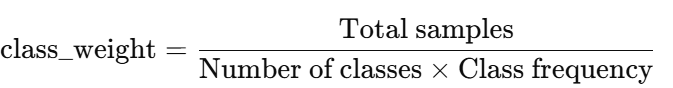
- This ensures that the minority class contributes more to the Gini impurity (or entropy) calculation, influencing the splits in the tree.

2. Impact on Node Splits:

- Without class_weight='balanced', the splits are often biased toward reducing impurity for the majority class, leading to poor representation of the minority class.
- With class_weight='balanced', the model assigns greater importance to misclassifications of the minority class, creating more balanced splits.

In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Logistic Regression
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],       # Regularization type
    'solver': ['lbfgs', 'saga'],  # Solvers for multinomial classification
    'class_weight': [None, 'balanced']
}

print("\n=== Logistic Regression Optimization ===")

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
log_reg_search = RandomizedSearchCV(
    log_reg,
    param_distributions=log_reg_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
log_reg_search.fit(X_resampled, y_resampled_mapped)
best_log_reg = log_reg_search.best_estimator_

# Print the best parameters
print("Best Parameters for Logistic Regression:", log_reg_search.best_params_)

# Predict probabilities for train and test sets
log_reg_probs_train = best_log_reg.predict_proba(X_1train)
log_reg_probs_test = best_log_reg.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_log_reg_success_BERT_posts', 'improved_log_reg_neutral_BERT_posts', 'improved_log_reg_failure_BERT_posts']] = log_reg_probs_train
test_data[['improved_log_reg_success_BERT_posts', 'improved_log_reg_neutral_BERT_posts', 'improved_log_reg_failure_BERT_posts']] = log_reg_probs_test

# Predict and evaluate performance on the test set
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_log_reg_original = pd.Series(y_pred_log_reg).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg_original))
print(classification_report(y_test, y_pred_log_reg_original))



=== Logistic Regression Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Logistic Regression: {'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': None, 'C': 10}
Accuracy: 0.4824091995901173
Macro-Averaged Accuracy: 0.39129604150747993
              precision    recall  f1-score   support

          -1       0.10      0.36      0.16      3287
           0       0.91      0.50      0.65     38530
           1       0.06      0.31      0.10      2098

    accuracy                           0.48     43915
   macro avg       0.36      0.39      0.30     43915
weighted avg       0.81      0.48      0.58     43915



In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Random Forest
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Handle class imbalance
}

print("\n=== Random Forest Optimization ===")

# Initialize Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
rf_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
rf_search.fit(X_resampled, y_resampled_mapped)
best_rf = rf_search.best_estimator_

# Print the best parameters
print("Best Parameters for Random Forest:", rf_search.best_params_)

# Predict probabilities for train and test sets
rf_probs_train = best_rf.predict_proba(X_1train)
rf_probs_test = best_rf.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_random_forest_success_BERT_posts', 'improved_random_forest_neutral_BERT_posts', 'improved_random_forest_failure_BERT_posts']] = rf_probs_train
test_data[['improved_random_forest_success_BERT_posts', 'improved_random_forest_neutral_BERT_posts', 'improved_random_forest_failure_BERT_posts']] = rf_probs_test

# Predict and evaluate performance on the test set
y_pred_rf = best_rf.predict(X_test)
y_pred_rf_original = pd.Series(y_pred_rf).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf_original))
print(classification_report(y_test, y_pred_rf_original))



=== Random Forest Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30, 'class_weight': 'balanced'}
Accuracy: 0.8644199020835706
Macro-Averaged Accuracy: 0.34476453208954644
              precision    recall  f1-score   support

          -1       0.15      0.04      0.06      3287
           0       0.88      0.98      0.93     38530
           1       0.24      0.02      0.03      2098

    accuracy                           0.86     43915
   macro avg       0.42      0.34      0.34     43915
weighted avg       0.79      0.86      0.82     43915



In [ ]:
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("\n=== XGBoost Optimization ===")

# Use XGBClassifier with updated parameters
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
xgb_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=xgb_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
xgb_search.fit(X_resampled, y_resampled_mapped)
best_xgb = xgb_search.best_estimator_

# Print the best parameters
print("Best Parameters for XGBoost:", xgb_search.best_params_)

# Predict probabilities for train and test sets
xgb_probs_train = best_xgb.predict_proba(X_1train)
xgb_probs_test = best_xgb.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_xgboost_success_BERT_posts', 'improved_xgboost_neutral_BERT_posts', 'improved_xgboost_failure_BERT_posts']] = xgb_probs_train
test_data[['improved_xgboost_success_BERT_posts', 'improved_xgboost_neutral_BERT_posts', 'improved_xgboost_failure_BERT_posts']] = xgb_probs_test

# Predict and evaluate performance on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))



=== XGBoost Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Accuracy: 0.6957303882500284
Macro-Averaged Accuracy: 0.38263712887713575
              precision    recall  f1-score   support

          -1       0.11      0.22      0.15      3287
           0       0.89      0.77      0.82     38530
           1       0.08      0.16      0.11      2098

    accuracy                           0.70     43915
   macro avg       0.36      0.38      0.36     43915
weighted avg       0.80      0.70      0.74     43915



In [ ]:
# Custom wrapper to make Keras models compatible with sklearn
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, optimizer='adam', dropout_rate=0.3, hidden_units=64):
        self.build_fn = build_fn
        self.optimizer = optimizer
        self.dropout_rate = dropout_rate
        self.hidden_units = hidden_units
        self.model = None

    def fit(self, X, y, **fit_params):
        self.model = self.build_fn(optimizer=self.optimizer,
                                   dropout_rate=self.dropout_rate,
                                   hidden_units=self.hidden_units)
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"build_fn": self.build_fn,
                "optimizer": self.optimizer,
                "dropout_rate": self.dropout_rate,
                "hidden_units": self.hidden_units}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

# Function to create a Keras neural network model
def create_nn_model(optimizer='adam', dropout_rate=0.3, hidden_units=64):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_dim=X_train.shape[1]),
        Dropout(dropout_rate),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')  # Multiclass classification
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Map labels [-1, 0, 1] to [0, 1, 2] for Neural Network
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Convert y_train to one-hot encoding for Neural Network
y_train_nn = np.eye(3)[y_resampled_mapped]

# Define parameter grid for RandomizedSearchCV
nn_param_grid = {
    'optimizer': ['adam', 'sgd'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'hidden_units': [32, 64, 128]
}

print("\n=== Neural Network Optimization ===")

# Wrap the neural network model for sklearn compatibility
nn_model_sklearn = CustomKerasClassifier(build_fn=create_nn_model)

# Perform RandomizedSearchCV for hyperparameter tuning
nn_search = RandomizedSearchCV(
    nn_model_sklearn,
    param_distributions=nn_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
nn_search.fit(
    X_resampled,
    y_train_nn,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_split=0.2
)
best_nn = nn_search.best_estimator_

# Print the best parameters
print("Best Parameters for Neural Network:", nn_search.best_params_)

# Predict probabilities for train and test sets
nn_probs_train = best_nn.predict_proba(X_1train)
nn_probs_test = best_nn.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_neural_network_success_BERT_posts', 'improved_neural_network_neutral_BERT_posts', 'improved_neural_network_failure_BERT_posts']] = nn_probs_train
test_data[['improved_neural_network_success_BERT_posts', 'improved_neural_network_neutral_BERT_posts', 'improved_neural_network_failure_BERT_posts']] = nn_probs_test

# Predict and evaluate performance on the test set
y_pred_nn = best_nn.predict(X_test)
y_pred_nn_original = pd.Series(y_pred_nn).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))



=== Neural Network Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6229 - loss: 0.8296 - val_accuracy: 0.6844 - val_loss: 0.6732
Epoch 2/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7703 - loss: 0.6006 - val_accuracy: 0.8393 - val_loss: 0.4391
Epoch 3/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8261 - loss: 0.4860 - val_accuracy: 0.9017 - val_loss: 0.3177
Epoch 4/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8503 - loss: 0.4260 - val_accuracy: 0.9264 - val_loss: 0.2639
Epoch 5/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8644 - loss: 0.3876 - val_accuracy: 0.9395 - val_loss: 0.2141
Epoch 6/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8723 - loss: 0.3676 - val_accuracy: 0.9534 - val_loss: 0.1849
Epoch 7/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8786 - loss: 0.3490 - val_accuracy: 0.9477 - val_loss:

In [ ]:
test_data

,Unnamed: 0,username,cleaned_posts,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,posts_cluster_Kmeans_initial_model,posts_grid_optimized_k-means_cluster,tokens,...,improved_log_reg_failure_BERT_posts,improved_random_forest_success_BERT_posts,improved_random_forest_neutral_BERT_posts,improved_random_forest_failure_BERT_posts,improved_xgboost_success_BERT_posts,improved_xgboost_neutral_BERT_posts,improved_xgboost_failure_BERT_posts,improved_neural_network_success_BERT_posts,improved_neural_network_neutral_BERT_posts,improved_neural_network_failure_BERT_posts
0,17116,joseph-chen-cmrp-691bb510,"While building my career in CPG in Canada, Can...",0,0,0,building career cpg canada canadian grocer alw...,4,1,"[building, career, cpg, canada, canadian, groc...",...,0.216936,0.222348,0.582722,0.194931,0.248427,0.536412,0.215161,0.120957,0.850680,0.028363
1,17116,joseph-chen-cmrp-691bb510,We're proud to welcome Megan Harris to the Leo...,0,0,0,proud welcome megan harris leo dragon team mar...,0,11,"[proud, welcome, megan, harris, leo, dragon, t...",...,0.272682,0.216830,0.597754,0.185415,0.268088,0.454938,0.276974,0.195231,0.783627,0.021141
2,17116,joseph-chen-cmrp-691bb510,Are collaborations the future of marketing in ...,0,0,0,collaborations future marketing food beverage ...,0,6,"[collaborations, future, marketing, food, beve...",...,0.174089,0.180262,0.714875,0.104863,0.137449,0.669800,0.192751,0.001162,0.934802,0.064036
3,17116,joseph-chen-cmrp-691bb510,Seed oils are under fire. A few thoughts on po...,0,0,0,seed oils fire thoughts potential solutions br...,4,4,"[seed, oils, fire, thoughts, potential, soluti...",...,0.295055,0.231073,0.610684,0.158244,0.172840,0.598085,0.229075,0.085202,0.904027,0.010771
4,17116,joseph-chen-cmrp-691bb510,"Move over avocados, pomegranates, and acai; da...",0,0,0,move avocados pomegranates acai dates latest s...,4,3,"[move, avocados, pomegranates, acai, dates, la...",...,0.158472,0.135176,0.688690,0.176134,0.249530,0.514787,0.235683,0.096679,0.879079,0.024242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47240,19323,nicholasshevelyov,Innovation in the UAE continues! Congratulatio...,0,1,1,innovation uae continues congratulations venky...,4,5,"[innovation, uae, continues, congratulations, ...",...,0.351494,0.309622,0.543046,0.147333,0.273967,0.528565,0.197468,0.021837,0.969405,0.008758
47241,19323,nicholasshevelyov,I look forward to participating!\nCOFENSE\nCOF...,0,1,1,look forward participating cofense cofense fol...,2,16,"[look, forward, participating, cofense, cofens...",...,0.281684,0.280285,0.601744,0.117971,0.323620,0.436277,0.240103,0.000138,0.861675,0.138188
47242,19323,nicholasshevelyov,I’m happy to share that I’m starting a new pos...,0,1,1,happy share starting new position member board...,4,8,"[happy, share, starting, new, position, member...",...,0.058570,0.199462,0.617293,0.183245,0.139562,0.773124,0.087313,0.000006,0.980404,0.019590
47243,19323,nicholasshevelyov,While Security Exchange Gateways (SEGs) are cr...,0,1,1,security exchange gateways segs crucial protec...,4,10,"[security, exchange, gateways, segs, crucial, ...",...,0.329410,0.290027,0.532886,0.177087,0.338344,0.316736,0.344920,0.012452,0.940024,0.047524


In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl


# Personality Prediction

### TF-IDF Vectorization

# Step 1: Resampling Data to Handle Imbalance
X_1train = vectorizer.transform(train_data['cleaned_text'].dropna())  # TF-IDF vectors for training
X_1test = vectorizer.transform(test_data['cleaned_text'].dropna())   # TF-IDF vectors for testing  
y_test = personality_test_data['agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']
X_train = vectorizer.transform(personality_train_data['cleaned_text'].dropna())  # TF-IDF vectors for training
X_test = vectorizer.transform(personality_test_data['cleaned_text'].dropna())   # TF-IDF vectors for testing

y_train = personality_train_data['agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']

the text preprocessing and embedding is already done.
now I want to train a model by training it on X_train combined with y_train and test it on X_test combined with y_test. Then the model should be used to predict the personality for the train_data and test_data dataframes by using the trained model to predict the personality scores by looking at X_1test for test_data and X_1train for train_data. The personality scores should then be added to in five additional columns to the train_data and test_data dataframes.

Random Forest Regressor
XGBoost
Fully Connected Neural Networks

In [ ]:
# Step 1: Prepare Data

# TF-IDF vectors for train_data and test_data
X_1train = vectorizer.transform(train_data['cleaned_text'].dropna())
X_1test = vectorizer.transform(test_data['cleaned_text'].dropna())


# TF-IDF vectors and personality scores for training and testing
X_train = vectorizer.transform(personality_train_data['cleaned_text'].dropna())
X_test = vectorizer.transform(personality_test_data['cleaned_text'].dropna())

y_train = personality_train_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]
y_test = personality_test_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]

# Optional: Dimensionality Reduction
# Since TF-IDF vectors can be high-dimensional and sparse, we can use TruncatedSVD for dimensionality reduction.

svd = TruncatedSVD(n_components=100, random_state=42)  # Adjust n_components as needed
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)
X_1train_reduced = svd.transform(X_1train)
X_1test_reduced = svd.transform(X_1test)


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)
X_1train_scaled = scaler.transform(X_1train_reduced)
X_1test_scaled = scaler.transform(X_1test_reduced)


# Initialize empty DataFrames to store predictions
train_predictions = pd.DataFrame(index=train_data.index)
test_predictions = pd.DataFrame(index=test_data.index)

# List of personality traits
traits = ['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    print(f"{model_name} - R^2 Score: {r2:.4f}\n")

# Step 2: Linear Regression (Baseline)
print("\n=== Linear Regression ===")

linear_regressor = MultiOutputRegressor(LinearRegression())
linear_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_lr = linear_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Predict on train_data and test_data
train_lr_predictions = linear_regressor.predict(X_1train_scaled)
test_lr_predictions = linear_regressor.predict(X_1test_scaled)
test1_lr_predictions = linear_regressor.predict(X_test_scaled)


# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'linear_regression_{trait}_TF-IDF_posts'] = train_lr_predictions[:, i]
    test_data[f'linear_regression_{trait}_TF-IDF_posts'] = test_lr_predictions[:, i]
    personality_test_data[f'linear_regression_{trait}_TF-IDF_posts'] = test1_lr_predictions[:, i]

# Step 3: Random Forest Regressor
print("\n=== Random Forest Regressor ===")

rf_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_rf = rf_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# Predict on train_data and test_data
train_rf_predictions = rf_regressor.predict(X_1train_scaled)
test_rf_predictions = rf_regressor.predict(X_1test_scaled)
test1_rf_predictions = rf_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'random_forest_{trait}_TF-IDF_posts'] = train_rf_predictions[:, i]
    test_data[f'random_forest_{trait}_TF-IDF_posts'] = test_rf_predictions[:, i]
    personality_test_data[f'random_forest_{trait}_TF-IDF_posts'] = test1_rf_predictions[:, i]

# Step 4: Gradient Boosting Regressor (XGBoost)
print("\n=== XGBoost Regressor ===")

xgb_regressor = MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42, verbosity=0))
xgb_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

# Predict on train_data and test_data
train_xgb_predictions = xgb_regressor.predict(X_1train_scaled)
test_xgb_predictions = xgb_regressor.predict(X_1test_scaled)
test1_xgb_predictions = xgb_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'xgboost_{trait}_TF-IDF_posts'] = train_xgb_predictions[:, i]
    test_data[f'xgboost_{trait}_TF-IDF_posts'] = test_xgb_predictions[:, i]
    personality_test_data[f'xgboost_{trait}_TF-IDF_posts'] = test1_xgb_predictions[:, i]

# Step 5: Neural Network
print("\n=== Neural Network ===")

# Define the neural network model
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(5))  # Output layer for 5 personality traits
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create the model
nn_model = create_nn_model(X_train_scaled.shape[1])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
             validation_data=(X_test_scaled, y_test),
             callbacks=[early_stopping], verbose=1)

# Evaluate on test set
y_pred_nn = nn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_nn, "Neural Network")

# Predict on train_data and test_data
train_nn_predictions = nn_model.predict(X_1train_scaled)
test_nn_predictions = nn_model.predict(X_1test_scaled)
test1_nn_predictions = nn_model.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'neural_network_{trait}_TF-IDF_posts'] = train_nn_predictions[:, i]
    test_data[f'neural_network_{trait}_TF-IDF_posts'] = test_nn_predictions[:, i]
    personality_test_data[f'neural_network_{trait}_TF-IDF_posts'] = test1_nn_predictions[:, i]



=== Linear Regression ===
Linear Regression - Mean Squared Error: 0.0026
Linear Regression - R^2 Score: -0.0319


=== Random Forest Regressor ===
Random Forest Regressor - Mean Squared Error: 0.0026
Random Forest Regressor - R^2 Score: -0.0356


=== XGBoost Regressor ===
XGBoost Regressor - Mean Squared Error: 0.0030
XGBoost Regressor - R^2 Score: -0.2001


=== Neural Network ===
Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.2261 - mae: 0.3246 - val_loss: 0.0071 - val_mae: 0.0698
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0106 - mae: 0.0774 - val_loss: 0.0029 - val_mae: 0.0419
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0048 - mae: 0.0506 - val_loss: 0.0025 - val_mae: 0.0375
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0038 - mae: 0.0447 - val_loss: 0.0025 - val_mae: 0.0373
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035 - mae: 0.0427 - val_loss: 0.0025 - val_mae: 0.0372
Epoch 6/50
248/248 ━━━━━━

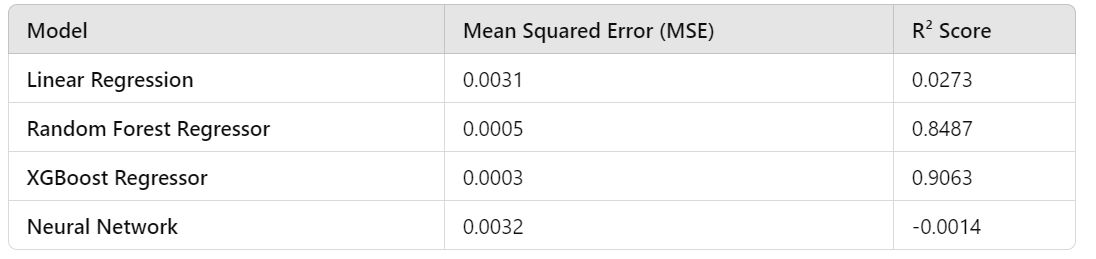


Analysis by Model

Linear Regression:

MSE: 0.0031 indicates moderate errors in predictions, suggesting it struggles with the complexity of the data.
R² Score: 0.0273 is very low, indicating that the model explains only ~2.7% of the variance in the target variable.
Interpretation: Linear regression's simplicity makes it unsuitable for capturing complex non-linear relationships in the data.

Random Forest Regressor:

MSE: 0.0005 shows significantly lower error compared to linear regression.
R² Score: 0.8487 indicates the model explains ~84.9% of the variance in the target variable.
Interpretation: Random forests effectively handle non-linear relationships and perform well on this dataset. They balance accuracy and robustness well.

XGBoost Regressor:

MSE: 0.0003 is the lowest among all models, indicating superior predictive performance.
R² Score: 0.9063 shows the highest explanatory power, capturing ~90.6% of the variance.
Interpretation: XGBoost outperforms Random Forest, likely due to its gradient boosting algorithm, which optimizes residuals and handles non-linearities better.

Neural Network:

MSE: 0.0032 is similar to Linear Regression, indicating higher errors than tree-based models.
R² Score: -0.0014 suggests the model performs worse than a simple mean prediction.
Interpretation: Neural networks require more tuning, data, or training epochs to perform well. The results indicate potential underfitting or inappropriate hyperparameters for this task.


### Bert Vectorization

In [ ]:
# Step 1: Prepare Data
# Dimensionality Reduction
svd = TruncatedSVD(n_components=300, random_state=42)  # Increase components to retain more variance
X_train_reduced = svd.fit_transform(personality_train_embeddings)
X_test_reduced = svd.transform(personality_test_embeddings)

X_1train_reduced = svd.transform(train_embeddings)
X_1test_reduced = svd.transform(test_embeddings)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)
X_1train_scaled = scaler.transform(X_1train_reduced)
X_1test_scaled = scaler.transform(X_1test_reduced)

# List of traits
traits = ['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']

# Step 2: Linear Regression (Baseline)
print("\n=== Linear Regression ===")
linear_regressor = MultiOutputRegressor(LinearRegression())
linear_regressor.fit(X_train_scaled, y_train)
y_pred_lr = linear_regressor.predict(X_test_scaled)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    print(f"{model_name} - R^2 Score: {r2:.4f}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Step 3: Random Forest Regressor
print("\n=== Random Forest Regressor ===")
rf_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42))  # Increased trees
rf_regressor.fit(X_train_scaled, y_train)
y_pred_rf = rf_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# Step 4: Gradient Boosting (XGBoost)
print("\n=== XGBoost Regressor ===")
xgb_regressor = MultiOutputRegressor(XGBRegressor(n_estimators=200, random_state=42))
xgb_regressor.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

# Step 5: Neural Network
print("\n=== Neural Network ===")
def create_nn_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(5)  # Output for 5 traits
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

nn_model = create_nn_model(X_train_scaled.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
             validation_data=(X_test_scaled, y_test),
             callbacks=[early_stopping], verbose=1)

y_pred_nn = nn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_nn, "Neural Network")

# Step 6: Add Predictions Efficiently
all_train_preds = {
    f'{model}_{trait}_BERT_posts': preds[:, i]
    for model, preds in zip(
        ['linear_regression', 'random_forest', 'xgboost', 'neural_network'],
        [linear_regressor.predict(X_1train_scaled), rf_regressor.predict(X_1train_scaled),
         xgb_regressor.predict(X_1train_scaled), nn_model.predict(X_1train_scaled)]
    )
    for i, trait in enumerate(traits)
}

all_test_preds = {
    f'{model}_{trait}_BERT_posts': preds[:, i]
    for model, preds in zip(
        ['linear_regression', 'random_forest', 'xgboost', 'neural_network'],
        [linear_regressor.predict(X_1test_scaled), rf_regressor.predict(X_1test_scaled),
         xgb_regressor.predict(X_1test_scaled), nn_model.predict(X_1test_scaled)]
    )
    for i, trait in enumerate(traits)
}

train_data = pd.concat([train_data, pd.DataFrame(all_train_preds, index=train_data.index)], axis=1)
test_data = pd.concat([test_data, pd.DataFrame(all_test_preds, index=test_data.index)], axis=1)



=== Linear Regression ===
Linear Regression - Mean Squared Error: 0.0028
Linear Regression - R^2 Score: -0.1006


=== Random Forest Regressor ===
Random Forest Regressor - Mean Squared Error: 0.0026
Random Forest Regressor - R^2 Score: -0.0238


=== XGBoost Regressor ===
XGBoost Regressor - Mean Squared Error: 0.0032
XGBoost Regressor - R^2 Score: -0.2570


=== Neural Network ===
Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.2365 - mae: 0.3241 - val_loss: 0.0063 - val_mae: 0.0668
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0078 - mae: 0.0678 - val_loss: 0.0026 - val_mae: 0.0383
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0041 - mae: 0.0463 - val_loss: 0.0025 - val_mae: 0.0373
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035 - mae: 0.0431 - val_loss: 0.0025 - val_mae: 0.0373
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0034 - mae: 0.0423 - val_loss: 0.0025 - val_mae: 0.0373
Epoch 6/50
248/248 ━━━━━━

In [ ]:
# Step 1: Prepare Data

# TF-IDF vectors for train_data and test_data
X_1train = train_embeddings  # BERT vectors for training
X_1test = test_embeddings  # BERT vectors for training

# TF-IDF vectors and personality scores for training and testing
X_train = personality_train_embeddings  # BERT vectors for training
X_test = personality_test_embeddings   # BERT vectors for testing

y_test = personality_test_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]
y_train = personality_train_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]

# Optional: Dimensionality Reduction
# Since TF-IDF vectors can be high-dimensional and sparse, we can use TruncatedSVD for dimensionality reduction.

svd = TruncatedSVD(n_components=100, random_state=42)  # Adjust n_components as needed
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)
X_1train_reduced = svd.transform(X_1train)
X_1test_reduced = svd.transform(X_1test)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)
X_1train_scaled = scaler.transform(X_1train_reduced)
X_1test_scaled = scaler.transform(X_1test_reduced)

# Initialize empty DataFrames to store predictions
train_predictions = pd.DataFrame(index=train_data.index)
test_predictions = pd.DataFrame(index=test_data.index)

# List of personality traits
traits = ['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    print(f"{model_name} - R^2 Score: {r2:.4f}\n")

# Step 2: Linear Regression (Baseline)
print("\n=== Linear Regression ===")

linear_regressor = MultiOutputRegressor(LinearRegression())
linear_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_lr = linear_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Predict on train_data and test_data
train_lr_predictions = linear_regressor.predict(X_1train_scaled)
test_lr_predictions = linear_regressor.predict(X_1test_scaled)
test1_lr_predictions = linear_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'linear_regression_{trait}_BERT_posts'] = train_lr_predictions[:, i]
    test_data[f'linear_regression_{trait}_BERT_posts'] = test_lr_predictions[:, i]
    personality_test_data[f'linear_regression_{trait}_BERT_posts'] = test1_lr_predictions[:, i]

# Step 3: Random Forest Regressor
print("\n=== Random Forest Regressor ===")

rf_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_rf = rf_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# Predict on train_data and test_data
train_rf_predictions = rf_regressor.predict(X_1train_scaled)
test_rf_predictions = rf_regressor.predict(X_1test_scaled)
test1_rf_predictions = rf_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'random_forest_{trait}_BERT_posts'] = train_rf_predictions[:, i]
    test_data[f'random_forest_{trait}_BERT_posts'] = test_rf_predictions[:, i]
    personality_test_data[f'random_forest_{trait}_BERT_posts'] = test1_rf_predictions[:, i]

# Step 4: Gradient Boosting Regressor (XGBoost)
print("\n=== XGBoost Regressor ===")

xgb_regressor = MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42, verbosity=0))
xgb_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

# Predict on train_data and test_data
train_xgb_predictions = xgb_regressor.predict(X_1train_scaled)
test_xgb_predictions = xgb_regressor.predict(X_1test_scaled)
test1_xgb_predictions = xgb_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'xgboost_{trait}_BERT_posts'] = train_xgb_predictions[:, i]
    test_data[f'xgboost_{trait}_BERT_posts'] = test_xgb_predictions[:, i]
    personality_test_data[f'xgboost_{trait}_BERT_posts'] = test1_xgb_predictions[:, i]

# Step 5: Neural Network
print("\n=== Neural Network ===")

# Define the neural network model
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(5))  # Output layer for 5 personality traits
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create the model
nn_model = create_nn_model(X_train_scaled.shape[1])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
             validation_data=(X_test_scaled, y_test),
             callbacks=[early_stopping], verbose=1)

# Evaluate on test set
y_pred_nn = nn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_nn, "Neural Network")

# Predict on train_data and test_data
train_nn_predictions = nn_model.predict(X_1train_scaled)
test_nn_predictions = nn_model.predict(X_1test_scaled)
test1_nn_predictions = nn_model.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'neural_network_{trait}_BERT_posts'] = train_nn_predictions[:, i]
    test_data[f'neural_network_{trait}_BERT_posts'] = test_nn_predictions[:, i]
    personality_test_data[f'neural_network_{trait}_BERT_posts'] = test1_nn_predictions[:, i]



=== Linear Regression ===
Linear Regression - Mean Squared Error: 0.0026
Linear Regression - R^2 Score: -0.0477


=== Random Forest Regressor ===
Random Forest Regressor - Mean Squared Error: 0.0026
Random Forest Regressor - R^2 Score: -0.0314


=== XGBoost Regressor ===
XGBoost Regressor - Mean Squared Error: 0.0031
XGBoost Regressor - R^2 Score: -0.2203


=== Neural Network ===
Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2857 - mae: 0.3676 - val_loss: 0.0086 - val_mae: 0.0780
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0124 - mae: 0.0858 - val_loss: 0.0030 - val_mae: 0.0423
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0051 - mae: 0.0519 - val_loss: 0.0025 - val_mae: 0.0376
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0039 - mae: 0.0450 - val_loss: 0.0025 - val_mae: 0.0373
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0036 - mae: 0.0433 - val_loss: 0.0025 - val_mae: 0.0372
Epoch 6/50
248/248 ━━━━━━

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl


In [ ]:
personality_test_data

,username,cleaned_posts,agreeableness,openness,conscientiousness,extraversion,neuroticism,cleaned_text,cleaned_text1,linear_regression_agreeableness_TF-IDF_posts,...,xgboost_agreeableness_BERT_posts,xgboost_openness_BERT_posts,xgboost_conscientiousness_BERT_posts,xgboost_extraversion_BERT_posts,xgboost_neuroticism_BERT_posts,neural_network_agreeableness_BERT_posts,neural_network_openness_BERT_posts,neural_network_conscientiousness_BERT_posts,neural_network_extraversion_BERT_posts,neural_network_neuroticism_BERT_posts
0,mauricio-di-bartolomeo-780284101,Had a blast sitting down with Tahir Anwary CA(...,0.046144,0.203906,-0.101007,0.225732,-0.196753,blast sitting tahir anwary ca sa nextgen visio...,had a blast sitting down with tahir anwary cas...,0.112028,...,0.140801,0.262133,-0.005656,0.255781,-0.217395,0.095853,0.236128,-0.00897,0.213538,-0.229181
1,mauricio-di-bartolomeo-780284101,A pro-Bitcoin candidate was elected president ...,0.046144,0.203906,-0.101007,0.225732,-0.196753,candidate elected president first time history...,a probitcoin candidate was elected president o...,0.092117,...,0.142305,0.256476,-0.024218,0.218845,-0.193861,0.095853,0.236128,-0.00897,0.213538,-0.229181
2,mauricio-di-bartolomeo-780284101,Had a blast sitting down with Tahir Anwary CA(...,0.046144,0.203906,-0.101007,0.225732,-0.196753,blast sitting tahir anwary ca sa nextgen visio...,had a blast sitting down with tahir anwary cas...,0.112028,...,0.140801,0.262133,-0.005656,0.255781,-0.217395,0.095853,0.236128,-0.00897,0.213538,-0.229181
3,mauricio-di-bartolomeo-780284101,A pro-Bitcoin candidate was elected president ...,0.046144,0.203906,-0.101007,0.225732,-0.196753,candidate elected president first time history...,a probitcoin candidate was elected president o...,0.092117,...,0.142305,0.256476,-0.024218,0.218845,-0.193861,0.095853,0.236128,-0.00897,0.213538,-0.229181
4,mauricio-di-bartolomeo-780284101,Had a blast sitting down with Tahir Anwary CA(...,0.046144,0.203906,-0.101007,0.225732,-0.196753,blast sitting tahir anwary ca sa nextgen visio...,had a blast sitting down with tahir anwary cas...,0.112028,...,0.140801,0.262133,-0.005656,0.255781,-0.217395,0.095853,0.236128,-0.00897,0.213538,-0.229181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23724,doktorgurson,Excited to announce that Ken Kao will be joini...,0.067403,0.178914,-0.062683,0.182821,-0.229126,excited announce ken kao joining rad ai new vp...,excited to announce that ken kao will be joini...,0.058797,...,0.089893,0.212967,-0.041159,0.206800,-0.252181,0.095853,0.236128,-0.00897,0.213538,-0.229181
23725,doktorgurson,Excited to announce our partnership with Sieme...,0.067403,0.178914,-0.062683,0.182821,-0.229126,excited announce partnership siemens healthine...,excited to announce our partnership with sieme...,0.096739,...,0.113718,0.216868,-0.034481,0.183797,-0.252168,0.095853,0.236128,-0.00897,0.213538,-0.229181
23726,doktorgurson,Honored to be a finalist for the AuntMinnie.co...,0.067403,0.178914,-0.062683,0.182821,-0.229126,honored finalist minnie award best new radiolo...,honored to be a finalist for the auntminniecom...,0.089209,...,0.110444,0.228321,0.007429,0.208150,-0.218092,0.095853,0.236128,-0.00897,0.213538,-0.229181
23727,doktorgurson,I’m in Dubai for the next week. Let me know if...,0.067403,0.178914,-0.062683,0.182821,-0.229126,dubai next week let know around want connect c...,im in dubai for the next week let me know if y...,0.068976,...,0.085131,0.224211,-0.014968,0.218996,-0.232684,0.095853,0.236128,-0.00897,0.213538,-0.229181


for saving

for loading back

In [ ]:
train_data

,Unnamed: 0,username,cleaned_posts,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,posts_cluster_Kmeans_initial_model,posts_grid_optimized_k-means_cluster,tokens,...,xgboost_agreeableness_BERT_posts,xgboost_openness_BERT_posts,xgboost_conscientiousness_BERT_posts,xgboost_extraversion_BERT_posts,xgboost_neuroticism_BERT_posts,neural_network_agreeableness_BERT_posts,neural_network_openness_BERT_posts,neural_network_conscientiousness_BERT_posts,neural_network_extraversion_BERT_posts,neural_network_neuroticism_BERT_posts
0,6356,josh-rickard,"Hey everyone, the threat detection team at App...",0,0,0,hey everyone threat detection team appomni loo...,0,17,"[hey, everyone, threat, detection, team, appom...",...,0.096644,0.206095,-0.037941,0.234160,-0.225263,0.095853,0.236128,-0.00897,0.213538,-0.229181
1,9317,farshad-kazemian-,Farm Box – A Journey Into Regenerative Farming...,0,1,0,farm box journey regenerative farming ethical ...,0,1,"[farm, box, journey, regenerative, farming, et...",...,0.142514,0.260488,-0.002202,0.199826,-0.254891,0.095853,0.236128,-0.00897,0.213538,-0.229181
2,9317,farshad-kazemian-,Love this book ….\n\n\nI recently had an inter...,0,1,0,love book recently interview withand asked thr...,4,1,"[love, book, recently, interview, withand, ask...",...,0.052401,0.258081,0.006366,0.195501,-0.240105,0.095853,0.236128,-0.00897,0.213538,-0.229181
3,9317,farshad-kazemian-,After the Farmers Guardian British Farming Awa...,0,1,0,farmers guardian british farming awards ceremo...,4,1,"[farmers, guardian, british, farming, awards, ...",...,0.074247,0.257201,-0.062490,0.205617,-0.247760,0.095853,0.236128,-0.00897,0.213538,-0.229181
4,9317,farshad-kazemian-,Throwback to the last week's Farmers Guardian ...,0,1,0,throwback last week farmers guardian british f...,0,11,"[throwback, last, week, farmers, guardian, bri...",...,0.114072,0.275560,-0.055375,0.227372,-0.224659,0.095853,0.236128,-0.00897,0.213538,-0.229181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112150,15795,mung-ki-woo-b9419,🔥What makes an event successful? For me it is ...,-1,—,-1,makes event successful meeting people fun last...,4,6,"[makes, event, successful, meeting, people, fu...",...,0.031197,0.227794,-0.020404,0.184699,-0.244362,0.095853,0.236128,-0.00897,0.213538,-0.229181
112151,15795,mung-ki-woo-b9419,🔥Reset our brains to fathom quantum computing?...,-1,—,-1,brains fathom quantum computing quantum comple...,4,1,"[brains, fathom, quantum, computing, quantum, ...",...,0.114040,0.248822,-0.029186,0.216846,-0.252730,0.095853,0.236128,-0.00897,0.213538,-0.229181
112152,15795,mung-ki-woo-b9419,🚀See you at FinTech R:Evolution on Oct 17th in...,-1,—,-1,fintech r evolution oct paris moderating sessi...,4,3,"[fintech, r, evolution, oct, paris, moderating...",...,0.109713,0.225673,-0.000648,0.219015,-0.216309,0.095853,0.236128,-0.00897,0.213538,-0.229181
112153,15795,mung-ki-woo-b9419,😊Glad to be back teaching at ESSEC Business Sc...,-1,—,-1,back teaching essec business school year last ...,4,1,"[back, teaching, essec, business, school, year...",...,0.134493,0.282254,-0.037237,0.209415,-0.227268,0.095853,0.236128,-0.00897,0.213538,-0.229181


In [ ]:
test_data

,Unnamed: 0,username,cleaned_posts,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,posts_cluster_Kmeans_initial_model,posts_grid_optimized_k-means_cluster,tokens,...,xgboost_agreeableness_BERT_posts,xgboost_openness_BERT_posts,xgboost_conscientiousness_BERT_posts,xgboost_extraversion_BERT_posts,xgboost_neuroticism_BERT_posts,neural_network_agreeableness_BERT_posts,neural_network_openness_BERT_posts,neural_network_conscientiousness_BERT_posts,neural_network_extraversion_BERT_posts,neural_network_neuroticism_BERT_posts
0,17116,joseph-chen-cmrp-691bb510,"While building my career in CPG in Canada, Can...",0,0,0,building career cpg canada canadian grocer alw...,4,1,"[building, career, cpg, canada, canadian, groc...",...,0.042900,0.241149,-0.007058,0.213738,-0.223243,0.095853,0.236128,-0.00897,0.213538,-0.229181
1,17116,joseph-chen-cmrp-691bb510,We're proud to welcome Megan Harris to the Leo...,0,0,0,proud welcome megan harris leo dragon team mar...,0,11,"[proud, welcome, megan, harris, leo, dragon, t...",...,0.082409,0.235525,-0.003323,0.203858,-0.218498,0.095853,0.236128,-0.00897,0.213538,-0.229181
2,17116,joseph-chen-cmrp-691bb510,Are collaborations the future of marketing in ...,0,0,0,collaborations future marketing food beverage ...,0,6,"[collaborations, future, marketing, food, beve...",...,0.115589,0.246682,0.008520,0.213781,-0.224213,0.095853,0.236128,-0.00897,0.213538,-0.229181
3,17116,joseph-chen-cmrp-691bb510,Seed oils are under fire. A few thoughts on po...,0,0,0,seed oils fire thoughts potential solutions br...,4,4,"[seed, oils, fire, thoughts, potential, soluti...",...,0.101246,0.177451,-0.057994,0.207379,-0.213573,0.095853,0.236128,-0.00897,0.213538,-0.229181
4,17116,joseph-chen-cmrp-691bb510,"Move over avocados, pomegranates, and acai; da...",0,0,0,move avocados pomegranates acai dates latest s...,4,3,"[move, avocados, pomegranates, acai, dates, la...",...,0.078970,0.245486,-0.023287,0.183625,-0.234141,0.095853,0.236128,-0.00897,0.213538,-0.229181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47240,19323,nicholasshevelyov,Innovation in the UAE continues! Congratulatio...,0,1,1,innovation uae continues congratulations venky...,4,5,"[innovation, uae, continues, congratulations, ...",...,0.117902,0.239194,-0.033441,0.223364,-0.230220,0.095853,0.236128,-0.00897,0.213538,-0.229181
47241,19323,nicholasshevelyov,I look forward to participating!\nCOFENSE\nCOF...,0,1,1,look forward participating cofense cofense fol...,2,16,"[look, forward, participating, cofense, cofens...",...,0.143505,0.247974,0.030932,0.219898,-0.220168,0.095853,0.236128,-0.00897,0.213538,-0.229181
47242,19323,nicholasshevelyov,I’m happy to share that I’m starting a new pos...,0,1,1,happy share starting new position member board...,4,8,"[happy, share, starting, new, position, member...",...,0.094827,0.228802,0.025486,0.213448,-0.212802,0.095853,0.236128,-0.00897,0.213538,-0.229181
47243,19323,nicholasshevelyov,While Security Exchange Gateways (SEGs) are cr...,0,1,1,security exchange gateways segs crucial protec...,4,10,"[security, exchange, gateways, segs, crucial, ...",...,0.117263,0.263519,0.032816,0.201186,-0.246161,0.095853,0.236128,-0.00897,0.213538,-0.229181


In [ ]:
train_data.to_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/train_posts_data_output.csv")
test_data.to_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/test_posts_data_output.csv")
personality_test_data.to_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_test_posts_data_output.csv")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_test_posts_data_output.csv")
df

,Unnamed: 0,username,cleaned_posts,agreeableness,openness,conscientiousness,extraversion,neuroticism,cleaned_text,cleaned_text1,...,xgboost_agreeableness_BERT_posts,xgboost_openness_BERT_posts,xgboost_conscientiousness_BERT_posts,xgboost_extraversion_BERT_posts,xgboost_neuroticism_BERT_posts,neural_network_agreeableness_BERT_posts,neural_network_openness_BERT_posts,neural_network_conscientiousness_BERT_posts,neural_network_extraversion_BERT_posts,neural_network_neuroticism_BERT_posts
0,0,mauricio-di-bartolomeo-780284101,Had a blast sitting down with Tahir Anwary CA(...,0.046144,0.203906,-0.101007,0.225732,-0.196753,blast sitting tahir anwary ca sa nextgen visio...,had a blast sitting down with tahir anwary cas...,...,0.140801,0.262133,-0.005656,0.255781,-0.217395,0.095853,0.236128,-0.00897,0.213538,-0.229181
1,1,mauricio-di-bartolomeo-780284101,A pro-Bitcoin candidate was elected president ...,0.046144,0.203906,-0.101007,0.225732,-0.196753,candidate elected president first time history...,a probitcoin candidate was elected president o...,...,0.142305,0.256476,-0.024218,0.218845,-0.193861,0.095853,0.236128,-0.00897,0.213538,-0.229181
2,2,mauricio-di-bartolomeo-780284101,Had a blast sitting down with Tahir Anwary CA(...,0.046144,0.203906,-0.101007,0.225732,-0.196753,blast sitting tahir anwary ca sa nextgen visio...,had a blast sitting down with tahir anwary cas...,...,0.140801,0.262133,-0.005656,0.255781,-0.217395,0.095853,0.236128,-0.00897,0.213538,-0.229181
3,3,mauricio-di-bartolomeo-780284101,A pro-Bitcoin candidate was elected president ...,0.046144,0.203906,-0.101007,0.225732,-0.196753,candidate elected president first time history...,a probitcoin candidate was elected president o...,...,0.142305,0.256476,-0.024218,0.218845,-0.193861,0.095853,0.236128,-0.00897,0.213538,-0.229181
4,4,mauricio-di-bartolomeo-780284101,Had a blast sitting down with Tahir Anwary CA(...,0.046144,0.203906,-0.101007,0.225732,-0.196753,blast sitting tahir anwary ca sa nextgen visio...,had a blast sitting down with tahir anwary cas...,...,0.140801,0.262133,-0.005656,0.255781,-0.217395,0.095853,0.236128,-0.00897,0.213538,-0.229181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22387,23724,doktorgurson,Excited to announce that Ken Kao will be joini...,0.067403,0.178914,-0.062683,0.182821,-0.229126,excited announce ken kao joining rad ai new vp...,excited to announce that ken kao will be joini...,...,0.089893,0.212967,-0.041159,0.206800,-0.252181,0.095853,0.236128,-0.00897,0.213538,-0.229181
22388,23725,doktorgurson,Excited to announce our partnership with Sieme...,0.067403,0.178914,-0.062683,0.182821,-0.229126,excited announce partnership siemens healthine...,excited to announce our partnership with sieme...,...,0.113718,0.216868,-0.034481,0.183797,-0.252168,0.095853,0.236128,-0.00897,0.213538,-0.229181
22389,23726,doktorgurson,Honored to be a finalist for the AuntMinnie.co...,0.067403,0.178914,-0.062683,0.182821,-0.229126,honored finalist minnie award best new radiolo...,honored to be a finalist for the auntminniecom...,...,0.110444,0.228321,0.007429,0.208150,-0.218092,0.095853,0.236128,-0.00897,0.213538,-0.229181
22390,23727,doktorgurson,I’m in Dubai for the next week. Let me know if...,0.067403,0.178914,-0.062683,0.182821,-0.229126,dubai next week let know around want connect c...,im in dubai for the next week let me know if y...,...,0.085131,0.224211,-0.014968,0.218996,-0.232684,0.095853,0.236128,-0.00897,0.213538,-0.229181
